<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Fill-Merch-State" data-toc-modified-id="Fill-Merch-State-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fill Merch State</a></span><ul class="toc-item"><li><span><a href="#Fill-the-state-for-the-records-with-valid-zipcode" data-toc-modified-id="Fill-the-state-for-the-records-with-valid-zipcode-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Fill the state for the records with valid zipcode</a></span></li><li><span><a href="#Group-bys-to-fill-missing-values" data-toc-modified-id="Group-bys-to-fill-missing-values-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Group bys to fill missing values</a></span></li></ul></li><li><span><a href="#Fill-Merch-Zip" data-toc-modified-id="Fill-Merch-Zip-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fill Merch Zip</a></span></li><li><span><a href="#Fill-Merch-Num" data-toc-modified-id="Fill-Merch-Num-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fill Merch Num</a></span></li><li><span><a href="#Remove-Fedex(Only-for-Benford's-Law)" data-toc-modified-id="Remove-Fedex(Only-for-Benford's-Law)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Remove Fedex(Only for Benford's Law)</a></span></li></ul></li><li><span><a href="#Candidate-Variables" data-toc-modified-id="Candidate-Variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Candidate Variables</a></span><ul class="toc-item"><li><span><a href="#Day-of-Week-Risk-Table" data-toc-modified-id="Day-of-Week-Risk-Table-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Day of Week Risk Table</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#forward-selection" data-toc-modified-id="forward-selection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>forward selection</a></span><ul class="toc-item"><li><span><a href="#Trial-1" data-toc-modified-id="Trial-1-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Trial 1</a></span></li><li><span><a href="#Trial-2" data-toc-modified-id="Trial-2-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Trial 2</a></span></li><li><span><a href="#Final-one" data-toc-modified-id="Final-one-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Final one</a></span></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#Boosted-Tree" data-toc-modified-id="Boosted-Tree-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Boosted Tree</a></span><ul class="toc-item"><li><span><a href="#gridsearch-:--(too-too-slow)" data-toc-modified-id="gridsearch-:--(too-too-slow)-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>gridsearch :  (too too slow)</a></span></li><li><span><a href="#long-for-loop:" data-toc-modified-id="long-for-loop:-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>long for loop:</a></span></li><li><span><a href="#Trial-30-Variables" data-toc-modified-id="Trial-30-Variables-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Trial 30 Variables</a></span></li></ul></li><li><span><a href="#Neural-Net" data-toc-modified-id="Neural-Net-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Neural Net</a></span></li></ul></li><li><span><a href="#Fit-All-EXCEPT-OOT,-using-the-best-model:" data-toc-modified-id="Fit-All-EXCEPT-OOT,-using-the-best-model:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit All EXCEPT OOT, using the best model:</a></span><ul class="toc-item"><li><span><a href="#Fraud-Score-cutoff" data-toc-modified-id="Fraud-Score-cutoff-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fraud Score cutoff</a></span></li></ul></li><li><span><a href="#Analyze-merchnum-and-cardnum" data-toc-modified-id="Analyze-merchnum-and-cardnum-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyze merchnum and cardnum</a></span></li></ul></div>

In [39]:


import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import time
from scipy import stats
from scipy.stats import zscore
import random
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import itertools
from typing import List
import time
from timeit import default_timer as timer
from scipy import stats
from scipy.stats import zscore
import random
import sys
import matplotlib.dates as mdates
import datetime
from datetime import datetime,timedelta
import calendar
from timeit import default_timer as timer
import itertools
from sklearn import datasets, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize,scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from matplotlib.pyplot import MultipleLocator

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, StratifiedKFold, cross_val_score, cross_val_predict

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# import regularizer
from keras.regularizers import l1 ,l2
from sklearn.utils import resample

from warnings import filterwarnings # this is to ignore convergence warnings

#KNN
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Data Cleaning

In [215]:
df = pd.read_excel('card transactions original.xlsx')

df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [217]:
zipfile= pd.read_excel('zipcode range.xlsx')
zipfile.head()

,State Name,Merch state,Zip_min,Zip_max
0,Alaska,AK,99501,99950
1,Alabama,AL,35004,36925
2,Arkansas,AR,71601,72959
3,Arizona,AZ,85001,86556
4,California,CA,90001,96162


In [218]:
outlier_index = np.where(df['Amount']==df['Amount'].max())[0][0]
outlier_index

52714

In [219]:
df=df.drop(df.index[52714])

In [220]:
df['Merch zip'].isnull().sum()

4655

In [221]:
df['Merch state'].isnull().sum()

1194

In [222]:
df = df.merge(zipfile, on = ['Merch state'], how='left')
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,State Name,Zip_min,Zip_max
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Tennessee,37010.0,38589.0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Massachusetts,1001.0,2791.0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Maryland,20331.0,21930.0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Tennessee,37010.0,38589.0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Tennessee,37010.0,38589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96747,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,Kentucky,40003.0,42788.0
96748,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,Ohio,43001.0,45999.0
96749,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,Ohio,43001.0,45999.0
96750,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,California,90001.0,96162.0


In [ ]:
comparedf=df[(df['Merch zip']>=df['Zip_min'])&(df['Merch zip']<=df['Zip_max'])]
#comparedf.to_csv('comparedf.csv')

In [223]:
df_wrong=df[(df['Merch zip']<df['Zip_min'])|(df['Merch zip']>df['Zip_max'])]
df_wrong

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,State Name,Zip_min,Zip_max
229,230,5142132941,2010-01-03,9104096250000,STAPLES #218,WA,20005.0,P,301.80,0,Washington,98001.0,99403.0
247,248,5142124762,2010-01-04,9104096250000,STAPLES #218,WA,20005.0,P,62.95,0,Washington,98001.0,99403.0
307,308,5142226204,2010-01-04,4620000731201,PORTERS CAMERA STORE,IA,5.0,P,104.16,0,Iowa,50001.0,52809.0
382,383,5142253356,2010-01-04,8889817332,AT&T WORLDNET SERVICES,FL,7054.0,P,19.95,0,Florida,32004.0,34997.0
419,420,5142144790,2010-01-04,9104096250000,STAPLES #218,WA,20005.0,P,30.32,0,Washington,98001.0,99403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96422,96424,5142258334,2010-12-29,6070042550005,HOME DEPOT #129,GA,3060.0,P,163.14,0,Georgia,30001.0,31999.0
96522,96524,5142180447,2010-12-30,6887894784113,RANGEL DISTRIBUTING CO,KS,64101.0,P,47.04,0,Kansas,66002.0,67954.0
96551,96553,5142179846,2010-12-30,6887894784113,RANGEL DISTRIBUTING CO,KS,64101.0,P,84.00,0,Kansas,66002.0,67954.0
96683,96685,5142180447,2010-12-30,6887894784113,RANGEL DISTRIBUTING CO,KS,64101.0,P,28.82,0,Kansas,66002.0,67954.0


In [224]:
a=df_wrong.groupby(['Merch description','Merch state','Merch zip'])
list(a.groups)

[('A J ABRAMS CO INC', 'NJ', 6880.0),
 ('ABS GRP INC/GOVT INST DIV', 'MD', 2.0),
 ('ACD SYSTEMS', 'CA', 11111.0),
 ('ADVANCE AUTO PARTS #5125', 'MO', 66112.0),
 ('ADVANCED CHEM DEVELOPMEN', 'CA', 11111.0),
 ('ADVANCED LOCK & SAFE INC', 'GA', 20151.0),
 ('AGENT FEE   8908111473613', 'PA', 2.0),
 ('AGENT FEE   8908111473613', 'PA', 22209.0),
 ('AGENT FEE   8908117237329', 'TX', 22209.0),
 ('AGILENT', 'GA', 3.0),
 ('AIR & WASTE MGMT ASSOC', 'PA', 1.0),
 ('ALL IN ONE SUPPLY', 'CO', 90712.0),
 ('AMAC KC PUBS', 'KS', 12983.0),
 ('AMAZON.COM  *SUPERSTOR', 'WA', 9.0),
 ('AMERICAN CHEMICAL SCTY', 'DC', 2.0),
 ('AMERICAN SPEAKER', 'DC', 21742.0),
 ('AOAC INTERNATIONAL', 'MD', 2.0),
 ('AOL*ONLINE SERVICE 0200', 'VA', 2.0),
 ('APPLIED IND TECH   744', 'OH', 48108.0),
 ('APPLIED IND TECH  0239', 'OH', 27703.0),
 ('APPLIED MEMBRANES INC', 'OH', 92069.0),
 ('ARIZONA INSTRUMENTS', 'AZ', 95040.0),
 ('AT AND T CHERRY HILL', 'NJ', 80020.0),
 ('AT AND T WHEELING', 'WV', 15222.0),
 ('AT YOUR OFFICE', 'VA',

In [225]:
# Unmatched groups
len(a)

200

In [226]:
# If we can find the store at its zip we correct the state
# if the zip code is close to its original state we correct the state
# if in its original state s right and the new zip is similliar to its old one, we cooect the zip
# if the company has only one address we correct the zip or state
# If the zip only has one digit zip, and state is correct we correct the zip
# if we are sure the zip is not correct,we fill the zip as unknown
# If we cannot find this company and zip is obviously wrong we fill as unknown
# If we cannot find the address, we correct the sates based on the zip
# Some company shows the state in their company name then we know the zip is wrong  ex.florida plants
# If the zip and state do not match and there is a store with the same zip we will correct state, since zip is harder to be typo
# If there are correct zip and state in the correct dataset, we fill the same value
# For some suspious fraud company we used the ip address location (ibillcs.com)
# some companies have been shut down, hard to find info

In [227]:
df.loc[df['Merch description']=='A J ABRAMS CO INC',['Merch state']]='CT'
df.loc[df['Merch description']=='A J ABRAMS CO INC',['Merch zip']]=6880

df.loc[(df['Merch description']=='ABS GRP INC/GOVT INST DIV')&(df['Merch state']=='MD'),['Merch zip']]=20879

df.loc[(df['Merch description']=='ACD SYSTEMS')&(df['Merch state']=='CA'),['Merch zip']]='unknown'

df.loc[(df['Merch description']=='ADVANCE AUTO PARTS #5125')&(df['Merch zip']==11111),['Merch state']]='KS'

# ? INVALID STATE
df.loc[(df['Merch description']=='ADVANCED CHEM DEVELOPMEN')&(df['Merch state']=='MO'),['Merch zip']]='unknown'

df.loc[(df['Merch description']=='ADVANCED LOCK & SAFE INC')&(df['Merch zip']==20151),['Merch state']]='VA'

df.loc[df['Merch description']=='AGENT FEE   8908111473613',['Merch state']]='VA'
df.loc[df['Merch description']=='AGENT FEE   8908117237329',['Merch state']]='VA'
df.loc[df['Merch description']=='AGENT FEE   8908111473613',['Merch zip']]=22209
df.loc[df['Merch description']=='AGENT FEE   8908117237329',['Merch zip']]=22209

df.loc[(df['Merch description']=='AGILENT')&(df['Merch state']=='GA'),['Merch zip']]=30022

df.loc[(df['Merch description']=='AIR & WASTE MGMT ASSOC')&(df['Merch state']=='PA'),['Merch zip']]=15222

df.loc[(df['Merch description']=='ALL IN ONE SUPPLY')&(df['Merch zip']==90712),['Merch state']]='CA'

df.loc[(df['Merch description']=='AMAC KC PUBS')&(df['Merch state']=='KS'),['Merch zip']]=66204

df.loc[(df['Merch description']=='AMAZON.COM  *SUPERSTOR')&(df['Merch state']=='WA'),['Merch zip']]=98109

df.loc[(df['Merch description']=='AMERICAN CHEMICAL SCTY')&(df['Merch state']=='DC'),['Merch zip']]=20036

df.loc[(df['Merch description']=='AMERICAN SPEAKER')&(df['Merch zip']==21742),['Merch state']]='MD'

df.loc[(df['Merch description']=='AOAC INTERNATIONAL')&(df['Merch state']=='MD'),['Merch zip']]=20877

df.loc[(df['Merch description']=='AOL*ONLINE SERVICE 0200')&(df['Merch state']=='VA'),['Merch zip']]=20166

df.loc[(df['Merch description']=='APPLIED IND TECH   744')&(df['Merch zip']==48108),['Merch state']]='MI'

df.loc[(df['Merch description']=='APPLIED IND TECH  0239')&(df['Merch zip']==27703),['Merch state']]='NC'

df.loc[(df['Merch description']=='APPLIED MEMBRANES INC')&(df['Merch zip']==92069),['Merch state']]='CA'

df.iloc[64351,6]='unknown'

df.loc[(df['Merch description']=='ARIZONA INSTRUMENTS')&(df['Merch state']=='AZ'),['Merch zip']]=85225

df.loc[(df['Merch description']=='AT AND T CHERRY HILL')&(df['Merch state']=='NJ'),['Merch zip']]=8002

df.loc[(df['Merch description']=='AT AND T WHEELING')&(df['Merch state']=='WV'),['Merch zip']]=26003

df.loc[(df['Merch description']=='AT YOUR OFFICE')&(df['Merch zip']==20004),['Merch state']]='DC'
df.loc[(df['Merch description']=='AT&T WORLDNET SERVICES')&(df['Merch zip']==7054),['Merch state']]='NJ'
df.loc[(df['Merch description']=='AT&T WS#1210210')&(df['Merch zip']==98033),['Merch state']]='WA'
df.loc[(df['Merch description']=='AT&T WS#53517942')&(df['Merch zip']==98033),['Merch state']]='WA'

df.loc[(df['Merch description']=='BATTERIES PLUS #080')&(df['Merch zip']==80123),['Merch state']]='CO'
df.loc[(df['Merch description']=='BELLSOUTH MOBILITY DCS')&(df['Merch zip']==30328),['Merch state']]='GA'
df.loc[(df['Merch description']=='BGI-BUDGET-PREMIER-RYDER')&(df['Merch zip']==21061),['Merch state']]='MD'

df.loc[(df['Merch description']=='BIGELOW LABORATORY')&(df['Merch zip']==4575),['Merch state']]='ME'
df.loc[(df['Merch description']=='BIO-RAD LABORATORIES INC.')&(df['Merch state']=='CA'),['Merch zip']]=94547
df.loc[(df['Merch description']=='BIOLOGIX TECHNOLOGIES')&(df['Merch state']=='WI'),['Merch zip']]=53716

df.loc[(df['Merch description']=='BLOWHITTAKER MOLECULAR')&(df['Merch zip']==4841),['Merch state']]='ME'
df.loc[(df['Merch description']=="BOCA INT'L INC")&(df['Merch state']=='IL'),['Merch zip']]='unknown'
df.loc[(df['Merch description']=='BURLINGTON AIR EXPRESS')&(df['Merch state']=='CA'),['Merch zip']]=90045

df.loc[(df['Merch description']=='BUY.COM')&(df['Merch state']=='CA'),['Merch zip']]=94402

In [228]:
df.loc[(df['Merch description']=='CAHNERS BUSINESS INFOR-')&(df['Merch state']=='MA'),['Merch zip']]=2140
df.loc[(df['Merch description']=='CANDLE COMMUNICATION')&(df['Merch zip']==89119),['Merch state']]='NV'
df.loc[(df['Merch description']=='CC *PC MALL')&(df['Merch state']=='CA'),['Merch zip']]=90241

df.loc[(df['Merch description']=='CHEMPLEX INDUSTRIES IN')&(df['Merch state']=='FL'),['Merch zip']]=34990
df.loc[(df['Merch description']=='COMPUTER ASSOCIATES')&(df['Merch state']=='NJ'),['Merch zip']]=7632
df.loc[(df['Merch description']=='CONCENTRA MED CTR-DEN AD')&(df['Merch state']=='CO'),['Merch zip']]=80202

df.loc[(df['Merch description']=='CONTROL DATA CIS INTERNET')&(df['Merch zip']==55126),['Merch state']]='MN'
df.loc[(df['Merch description']=='CONTROLS & METERS')&(df['Merch state']=='MN'),['Merch zip']]=55439
df.loc[(df['Merch description']=='COP*COPLEY NEWSPAPERS')&(df['Merch zip']==92073),['Merch state']]='CA'

df.loc[(df['Merch description']=='CRUACHEM INC')&(df['Merch zip']==20166),['Merch state']]='PA'
df.loc[(df['Merch description']=='DAY WIRELESS SYSTEMS')&(df['Merch zip']==98032),['Merch state']]='CA'
df.loc[(df['Merch description']=='DOUBLETREE HOTELS NATL AP')&(df['Merch zip']==98188),['Merch state']]='WA'

df.loc[(df['Merch description']=='DT SOFTWARE INC DT SERCH')&(df['Merch state']=='MD'),['Merch zip']]=20814
df.loc[(df['Merch description']=='EARTH FORCE INC')&(df['Merch state']=='VA'),['Merch zip']]=22301
df.loc[(df['Merch description']=='ELEMENT K PRESS JOURNALS')&(df['Merch state']=='NY'),['Merch zip']]=14623
df.loc[(df['Merch description']=='ELEMENT K PRESS STORE.COM')&(df['Merch state']=='NY'),['Merch zip']]=14623

df.loc[(df['Merch description']=='ENET HOLDING INC')&(df['Merch state']=='NJ'),['Merch zip']]=8540
df.loc[(df['Merch description']=='EQUIFAX INFO SERVIC')&(df['Merch state']=='GA'),['Merch zip']]=30374

df.loc[(df['Merch description']=='EW *EYEWIRE INC CATALG')&(df['Merch zip']==53224),['Merch state']]='WI'
df.loc[(df['Merch description']=='EW *EYEWIRE INC WEB')&(df['Merch zip']==53224),['Merch state']]='WI'

df.loc[(df['Merch description']=='FCN/CRC/LEWIS/SLP')&(df['Merch zip']==33431),['Merch state']]='FL'

df.loc[(df['Merch description']=='FEDERAL EXECUTIVE BOAR')&(df['Merch zip']==64131),['Merch state']]='MO'
df.loc[(df['Merch description']=='FEDERAL EXECUTIVE BOAR')&(df['Merch state']=='MO'),['Merch zip']]=64151

df.loc[(df['Merch description']=='FISHER SCI ATL')&(df['Merch state']=='GA'),['Merch zip']]=30024

df.loc[(df['Merch description']=='FLORIDA PLANTS ONLINE')&(df['Merch state']=='FL'),['Merch zip']]=68106

df.loc[(df['Merch description']=='FOTODYNE INC')&(df['Merch state']=='WI'),['Merch zip']]=53029

df.loc[(df['Merch description']=='FRANKLIN COVEY #7090')&(df['Merch state']=='CA'),['Merch zip']]=91007

df.loc[(df['Merch description']=='FRANKLIN COVEY COMPANY')&(df['Merch state']=='UT'),['Merch zip']]=84119

df.loc[(df['Merch description']=='FREEMAN DECORATING')&(df['Merch zip']==22304),['Merch state']]='VA'
df.loc[(df['Merch description']=='FREEMAN DECORATING')&(df['Merch state']=='VA'),['Merch zip']]=22314
df.loc[(df['Merch description']=='FREEMAN DECORATING')&(df['Merch zip']==7032),['Merch state']]='NJ'

df.loc[(df['Merch description']=='GENERAL SERVICES ADMIN')&(df['Merch zip']==64131),['Merch state']]='MO'
df.loc[(df['Merch description']=='GES/CHICAGO-71')&(df['Merch zip']==32819),['Merch state']]='FL'

df.loc[(df['Merch description']=='GLOBAL COMPUTER SUPPLY')&(df['Merch state']=='IL'),['Merch zip']]=60450

df.loc[(df['Merch description']=='GRADUATE SCHOOL USDA')&(df['Merch zip']==75242),['Merch state']]='TX'
df.loc[(df['Merch description']=='GRADUATE SCHOOL USDA')&(df['Merch state']=='TX'),['Merch zip']]=75242

df.loc[(df['Merch description']=='GRANTHAM COLLEGE OF')&(df['Merch state']=='LA'),['Merch zip']]=70460

df.loc[(df['Merch description']=='GTE WIRELESS')&(df['Merch state']=='GA'),['Merch zip']]=30346

df.loc[(df['Merch description']=='GUESS RETAIL STORE #505')&(df['Merch state']=='FL'),['Merch zip']]=33139

df.loc[(df['Merch description']=='GULF SOUTH MEDICAL SUPPLY')&(df['Merch state']=='FL'),['Merch zip']]=39157

df.loc[(df['Merch description']=='HAWTHORN SUITES, LTD')&(df['Merch state']=='AK'),['Merch zip']]=99501

df.loc[(df['Merch description']=='HILL MANUFACTURING CO INC')&(df['Merch state']=='GA'),['Merch zip']]=30315

df.loc[(df['Merch description']=='HOLIDAY INNS HTL & ST HS')&(df['Merch state']=='VA'),['Merch zip']]=23451

df.loc[(df['Merch description']=='HOME DEPOT #129')&(df['Merch state']=='GA'),['Merch zip']]=30606

# IP ADDRESS IS AT THIS LOCATION
df.loc[(df['Merch description']=='IBILL  *www.ibillCS.com')&(df['Merch zip']==3),['Merch state']]='VA'
df.loc[(df['Merch description']=='IBILL  *www.ibillCS.com')&(df['Merch state']=='VA'),['Merch zip']]=20149

df.loc[(df['Merch description']=='ICON HEALTH & FITNESS')&(df['Merch state']=='ut'),['Merch zip']]=84321

df.loc[(df['Merch description']=='IMS OF KANSAS CITY INC')&(df['Merch zip']==66214),['Merch state']]='KS'

df.loc[(df['Merch description']=='ISSX')&(df['Merch zip']==20014),['Merch state']]='DC'
df.loc[(df['Merch description']=='ISSX')&(df['Merch state']=='DC'),['Merch zip']]=20006

df.loc[(df['Merch description']=='JB COMPUTER CONSULTING')&(df['Merch state']=='CT'),['Merch zip']]=6611

df.loc[(df['Merch description']=='JERRY CROUSES TIRE/AUTO')&(df['Merch state']=='CO'),['Merch zip']]=80501

df.loc[(df['Merch description']=='KEYSAN CATALOG')&(df['Merch zip']==33308),['Merch state']]='FL'

df.loc[(df['Merch description']=="KINKO'S, INC #418")&(df['Merch zip']==66105),['Merch state']]='KS'
df.loc[(df['Merch description']=="KINKO'S,INC #671")&(df['Merch zip']==93002),['Merch state']]='CA'

#FRAUD
df.loc[(df['Merch description']=='KROGER #374        SL9')&(df['Merch zip']==25231),['Merch state']]='TX'
df.loc[(df['Merch description']=='KROGER #374        SL9')&(df['Merch state']=='TX'),['Merch zip']]=77095

df.loc[(df['Merch description']=='KRUG FURNITURE INC')&(df['Merch state']=='CA'),['Merch zip']]=95112

df.loc[(df['Merch description']=='LEHIGH SAFETY SHOE CO')&(df['Merch state']=='OH'),['Merch zip']]=60638

df.loc[(df['Merch description']=='LIGHT IMPRESSIONS')&(df['Merch state']=='CA'),['Merch zip']]=92821

df.loc[(df['Merch description']=='LINCOLN COUNTY JOURNAL')&(df['Merch zip']==63379),['Merch state']]='MO'

df.loc[(df['Merch description']=='MADISON COMPANY')&(df['Merch state']=='CT'),['Merch zip']]=6405

df.loc[(df['Merch description']=='MAINE BIOTECHNOLOGY SVCS.')&(df['Merch zip']==4103),['Merch state']]='ME'

df.loc[(df['Merch description']=='MALLINCKRODT-BAKER INC')&(df['Merch zip']==8865),['Merch state']]='NJ'

df.loc[(df['Merch description']=='MARYLAND COMPUTER SYS')&(df['Merch state']=='MD'),['Merch zip']]=20646

df.loc[(df['Merch description']=='MATRIX TECHNOLOGIES CORP')&(df['Merch zip']==3051),['Merch state']]='NH'

df.loc[(df['Merch description']=='MICHAELS STORES, INC. #87')&(df['Merch state']=='RI'),['Merch zip']]=2886

df.loc[(df['Merch description']=='MICRO CENTER #191 RETAIL')&(df['Merch zip']==11590),['Merch state']]='NY'

df.loc[(df['Merch description']=='MID STATE CAMERA SERVICE')&(df['Merch state']=='IL'),['Merch zip']]=60602

df.loc[(df['Merch description']=='MIDWAY AIR  8781597326876')&(df['Merch state']=='NC'),['Merch zip']]=27707

df.loc[(df['Merch description']=='MITTLER SUPPLY INC')&(df['Merch state']=='IN'),['Merch zip']]=46334

df.loc[(df['Merch description']=='MONSTER.COM #15')&(df['Merch state']=='MA'),['Merch zip']]=2493

df.loc[(df['Merch description']=='MUTUAL SAFE COMPANY INC')&(df['Merch state']=='CA'),['Merch zip']]=92627

df.loc[(df['Merch description']=='NAT ACCTS #951')&(df['Merch state']=='GA'),['Merch zip']]=30328

df.loc[(df['Merch description']=='NAT* GEOGRAPHIC MAG')&(df['Merch zip']==20036),['Merch state']]='DC'

df.loc[(df['Merch description']=='NCT HEARING PRODUCTS')&(df['Merch state']=='CT'),['Merch zip']]=6880

df.loc[(df['Merch description']=='NELLCOR PURITAN BENNETT')&(df['Merch zip']==94588),['Merch state']]='CA'

df.loc[(df['Merch description']=='NITON CORPORATION')&(df['Merch zip']==1730),['Merch state']]='MA'

df.loc[(df['Merch description']=='NMSU-STUDENT ACCOUNTS')&(df['Merch state']=='NM'),['Merch zip']]=88003

df.loc[(df['Merch description']=='NORTH CAROLINA STATE')&(df['Merch state']=='NC'),['Merch zip']]=27695

df.loc[(df['Merch description']=='NOVA RESEARCH COMPANY')&(df['Merch state']=='MD'),['Merch zip']]=20910

df.loc[(df['Merch description']=='OFFICE DEPOT #1082')&(df['Merch state']=='MD'),['Merch zip']]=20763

#('OFFICE DEPOT #1090', 'MA', 55441.0) MAY BE FRAUD
df.iloc[63501,6]=1752

#STORE : 360 420 452 629
df.iloc[14233,6]=30078
df.iloc[71140,6]=38671
df.iloc[19236,6]=80012
df.iloc[86956,5]='PA'

df.loc[(df['Merch description']=='OFFICE DEPOT #804')&(df['Merch zip']==84107),['Merch state']]='AL'
df.loc[(df['Merch description']=='OFFICE DEPOT #804')&(df['Merch state']=='AL'),['Merch zip']]=35801

df.loc[(df['Merch description']=='OMNISTAR INC')&(df['Merch zip']==77063),['Merch state']]='TX'
df.loc[(df['Merch description']=='OMNISTAR INC')&(df['Merch state']=='TX'),['Merch zip']]=77081

df.loc[(df['Merch description']=='ONVIA.COM')&(df['Merch state']=='WA'),['Merch zip']]=98101

df.loc[(df['Merch description']=='PC *PC CONNECTION')&(df['Merch state']=='NH'),['Merch zip']]=3054

df.loc[(df['Merch description']=='PGH INTL AIRPORT   Q3J')&(df['Merch state']=='PA'),['Merch zip']]=15231

df.loc[(df['Merch description']=='PH MOTION  AND  CONTROL S')&(df['Merch zip']==48083),['Merch state']]='MI'

df.loc[(df['Merch description']=='PORTERS CAMERA STORE')&(df['Merch state']=='IA'),['Merch zip']]=50613

df.loc[(df['Merch description']=='PROFESS OFC ENTERPRISES')&(df['Merch state']=='VA'),['Merch zip']]=22304

df.loc[(df['Merch description']=='PH FILTRATION BOSTON')&(df['Merch state']=='MA'),['Merch zip']]=1876

df.loc[(df['Merch description']=='PUMA TECHNOLOGY SERVICES')&(df['Merch state']=='CA'),['Merch zip']]=94117

df.loc[(df['Merch description']=='RADIO SHACK   00140731')&(df['Merch state']=='CO'),['Merch zip']]=80202
df.loc[(df['Merch description']=='RADIO SHACK   00186049')&(df['Merch state']=='CO'),['Merch zip']]=80206

df.loc[(df['Merch description']=='RANGEL DISTRIBUTING CO')&(df['Merch zip']==64101),['Merch state']]='MO'

df.loc[(df['Merch description']=='RED WING SHOES 824')&(df['Merch zip']==60402),['Merch state']]='IL'
df.loc[(df['Merch description']=='RED WING SHOES 845')&(df['Merch zip']==60515),['Merch state']]='IL'
df.loc[(df['Merch description']=='RED WING SHOES 884')&(df['Merch zip']==94015),['Merch state']]='CA'
df.loc[(df['Merch description']=='RED WING SHOES 888')&(df['Merch zip']==30083),['Merch state']]='GA'
df.loc[(df['Merch description']=='RED WING SHOES 897')&(df['Merch zip']==60194),['Merch state']]='IL'
df.loc[(df['Merch description']=='RED WING SHOES 902')&(df['Merch zip']==22150),['Merch state']]='VA'

df.loc[(df['Merch description']=='REGNET')&(df['Merch zip']==91321),['Merch state']]='CO'

df.loc[(df['Merch description']=='REPROGRPHC TECHNLGIES INC')&(df['Merch state']=='MD'),['Merch zip']]=20879

df.loc[(df['Merch description']=='RITZ CAMERA #528')&(df['Merch zip']==60604),['Merch state']]='IL'

df.loc[(df['Merch description']=='RITZ CAMERA CENTER #1021')&(df['Merch zip']==20705),['Merch state']]='WA'

df.loc[(df['Merch description']=='RIVIERA HOTEL AND CASINO')&(df['Merch state']=='NV'),['Merch zip']]=89109

df.loc[(df['Merch description']=='RSEWEB.COM 8774054986')&(df['Merch state']=='CA'),['Merch zip']]=91324

df.loc[(df['Merch description']=='ROGUE WARE SFTWR SERV')&(df['Merch state']=='CA'),['Merch zip']]=94501

df.loc[(df['Merch description']=='S  *S S ARTS  CRAFT')&(df['Merch state']=='CT'),['Merch zip']]=6415

df.loc[(df['Merch description']=='SAVIN CORP')&(df['Merch state']=='GA'),['Merch zip']]=30097

df.loc[(df['Merch description']=='SHELL NO 27424732603')&(df['Merch zip']==80120),['Merch state']]='CO'

df.loc[(df['Merch description']=='SKILLPATH SEMINARS CANADA')&(df['Merch state']=='KS'),['Merch zip']]=66202

df.loc[(df['Merch description']=='SLEEPING BEAR/AA PRESS')&(df['Merch state']=='MI'),['Merch zip']]=48104

df.loc[(df['Merch description']=='SOFTCHOICE CORPORATION')&(df['Merch zip']==10003),['Merch state']]='NY'

df.loc[(df['Merch description']=="SOFTWARE SHELF INT'L INC")&(df['Merch state']=='FL'),['Merch zip']]=33755

df.loc[(df['Merch description']=="SPRINT PCS #998")&(df['Merch state']=='MO'),['Merch zip']]=64112
df.loc[(df['Merch description']=="SPRINT PCS #998")&(df['Merch state']=='MO'),['Merch zip']]=64112

df.loc[(df['Merch description']=='STAPLES #218')&(df['Merch zip']==20005),['Merch state']]='DC'
df.loc[(df['Merch description']=="STAPLES #792")&(df['Merch state']=='VA'),['Merch zip']]=22021
df.loc[(df['Merch description']=="STAPLES #941")&(df['Merch state']=='PA'),['Merch zip']]=17201
df.loc[(df['Merch description']=='STAPLES #98')&(df['Merch zip']==17404),['Merch state']]='PA'

df.loc[(df['Merch description']=='STRATAGENE CLONING SYS')&(df['Merch zip']==92037),['Merch state']]='CA'

df.loc[(df['Merch description']=="STRAYER COLLEGE")&(df['Merch state']=='MD'),['Merch zip']]=20746
df.loc[(df['Merch description']=="STRAYER UNIVERSITY")&(df['Merch state']=='MD'),['Merch zip']]=20746

df.loc[(df['Merch description']=='STUART C IRBY COMPANY 11')&(df['Merch zip']==39215),['Merch state']]='MS'

df.loc[(df['Merch description']=='STUART PROMOTIONAL PROD')&(df['Merch zip']==34609),['Merch state']]='PA'

df.loc[(df['Merch description']=="SUN MICROSYSTEMS, INC.")&(df['Merch state']=='CA'),['Merch zip']]=94303

df.loc[(df['Merch description']=="SYBASE IAD SUBSCRIPTION")&(df['Merch state']=='CA'),['Merch zip']]=95008

df.loc[(df['Merch description']=="SYNERGY SOLUTIONS, INC")&(df['Merch state']=='NY'),['Merch zip']]=89120
df.loc[(df['Merch description']=='SYNERGY SOLUTIONS, INC')&(df['Merch zip']==89120),['Merch state']]='NV'

df.loc[(df['Merch description']=='TEKTRONIX MBD PARTS 09')&(df['Merch zip']==97077),['Merch state']]='OR'

df.loc[(df['Merch description']=='TERATOLOGY SOCIETY')&(df['Merch zip']==20190),['Merch state']]='VA'

df.loc[(df['Merch description']=="THE HOME DEPOT #129")&(df['Merch state']=='GA'),['Merch zip']]=30606

df.loc[(df['Merch description']=='THE NATL ASSOC ENV PROFS')&(df['Merch zip']==33853),['Merch state']]='FL'

df.loc[(df['Merch description']=='THE SPORTS AUTHORITY #804')&(df['Merch zip']==8648),['Merch state']]='NJ'

df.loc[(df['Merch description']=='TLC')&(df['Merch zip']==20740),['Merch state']]='MD'

df.loc[(df['Merch description']=='TLC              00 OF 00')&(df['Merch zip']==20740),['Merch state']]='MD'

df.loc[(df['Merch description']=="TROEMNER LLC")&(df['Merch state']=='NJ'),['Merch zip']]=8086

df.loc[(df['Merch description']=='TTL AUDIO VISUAL SYTM INC')&(df['Merch zip']==20910),['Merch state']]='MD'

df.loc[(df['Merch description']=='UNITED AIR  0161590898501')&(df['Merch zip']==60007),['Merch state']]='IL'

df.loc[(df['Merch description']=="UPPER VALLEY LOCK DOCTOR")&(df['Merch state']=='NH'),['Merch zip']]=3741

df.loc[(df['Merch description']=="US EXPRESS INC")&(df['Merch state']=='MD'),['Merch zip']]=20785

df.loc[(df['Merch description']=='VICKERS INC TRAINING CTR')&(df['Merch zip']==48309),['Merch state']]='MI'

df.loc[(df['Merch description']=='WASHINGTON COURIER')&(df['Merch zip']==20036),['Merch state']]='DC'

df.loc[(df['Merch description']=='WASHINTON SERVICE BUREAU')&(df['Merch zip']==10019),['Merch state']]='DC'
df.loc[(df['Merch description']=="WASHINTON SERVICE BUREAU")&(df['Merch state']=='DC'),['Merch zip']]=20005

df.loc[(df['Merch description']=="WQT*D SNORE 1OF1")&(df['Merch state']=='CA'),['Merch zip']]=91360

df.loc[(df['Merch description']=='WirelessCall to 888271028')&(df['Merch zip']==2109),['Merch state']]='MA'

df.loc[(df['Merch description']=="ZDU.COM WEB PURCHASES")&(df['Merch state']=='NY'),['Merch zip']]='unknown'

df.loc[(df['Merch description']=="RADIOSHACK.COM 0757005")&(df['Merch state']=='TX'),['Merch zip']]=75705



In [ ]:
# DID NOT FIND ANY RECORD 
#('O O O CHECKMATE', 'CA', 80535.0) 
#('SUN AUTHORIZED SOFTWARE', 'CA', 68106.0)
#('SUPPLY ONE #6', 'OR', 80301.0)
#('THE WELLNESS NEWSLETTER', 'NY', 32034.0)
#('WESTWOOD ACCOUNTING', 'TX', 19111.0)

In [ ]:
# For merch description =='Retail credit adjustment', there are 357 records without state and zip,
# we just replace them with "unknown"
#df.loc[(df['Merch description']=='RETAIL CREDIT ADJUSTMENT')  & (df['Merch state'].isnull()) &(df['Merch zip'].isnull())]

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96752 entries, 0 to 96751
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96752 non-null  int64         
 1   Cardnum            96752 non-null  int64         
 2   Date               96752 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96752 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92136 non-null  object        
 7   Transtype          96752 non-null  object        
 8   Amount             96752 non-null  float64       
 9   Fraud              96752 non-null  int64         
 10  State Name         95186 non-null  object        
 11  Zip_min            95186 non-null  float64       
 12  Zip_max            95186 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory 

In [ ]:
#df.loc[(df['Merch description']=='RETAIL CREDIT ADJUSTMENT')  & (df['Merch state'].isnull()) &(df['Merch zip'].isnull()),['Merch state']]='unknown'
#df.loc[df['Merch description']=='RETAIL CREDIT ADJUSTMENT',['Merch zip']]='unknown'

In [230]:
# Drop zipfile for the next merge 
df=df.drop(columns=['State Name','Zip_min','Zip_max'])
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96747,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042,P,84.79,0
96748,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248,P,118.75,0
96749,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150,P,363.56,0
96750,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0


In [231]:
df = df.merge(zipfile, on = ['Merch state'], how='left')
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,State Name,Zip_min,Zip_max
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Tennessee,37010.0,38589.0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,Massachusetts,1001.0,2791.0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Maryland,20331.0,21930.0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,Tennessee,37010.0,38589.0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Tennessee,37010.0,38589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96747,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042,P,84.79,0,Kentucky,40003.0,42788.0
96748,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248,P,118.75,0,Ohio,43001.0,45999.0
96749,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150,P,363.56,0,Ohio,43001.0,45999.0
96750,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0,California,90001.0,96162.0


In [232]:
df_not_miss_zip_state=df[(df['Merch zip'].notnull())&(df['Merch state'].notnull()) & (df['Merch zip']!='unknown')]
df_not_miss_zip_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92043 entries, 0 to 96751
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             92043 non-null  int64         
 1   Cardnum            92043 non-null  int64         
 2   Date               92043 non-null  datetime64[ns]
 3   Merchnum           90225 non-null  object        
 4   Merch description  92043 non-null  object        
 5   Merch state        92043 non-null  object        
 6   Merch zip          92043 non-null  object        
 7   Transtype          92043 non-null  object        
 8   Amount             92043 non-null  float64       
 9   Fraud              92043 non-null  int64         
 10  State Name         92043 non-null  object        
 11  Zip_min            92043 non-null  float64       
 12  Zip_max            92043 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory 

In [233]:
# Check after correction, we still have 42 unmatched rows due to no information found online
rr=0
for i in range(len(df_not_miss_zip_state)):
    
    if df_not_miss_zip_state.iloc[i,6]<df_not_miss_zip_state.iloc[i,11] or df_not_miss_zip_state.iloc[i,6]>df_not_miss_zip_state.iloc[i,12]:
        rr=rr+1
print('unmatched due to cannot find record online:',rr)    

unmatched due to cannot find record online: 42


## Fill Merch State

### Fill the state for the records with valid zipcode

In [234]:
df['Merch state'].isnull().sum()

1194

In [235]:
df = df.drop(columns=['State Name','Zip_min','Zip_max'])

In [236]:
df_with_zip_nostate=df[(df['Merch zip'].notnull())&(df['Merch state'].isnull())]
df_with_zip_nostate['index']=df_with_zip_nostate.index
df_with_zip_nostate

<ipython-input-236-5c33d556a468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_zip_nostate['index']=df_with_zip_nostate.index


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,index
3258,3259,5142153880,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2340.00,0,3258
3262,3263,5142154098,2010-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2387.00,0,3262
3540,3541,5142154098,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0,3540
3642,3643,5142153880,2010-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2500.00,0,3642
4969,4970,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,83.00,0,4969
5229,5230,5142194136,2010-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,929,P,480.00,0,5229
5636,5637,5142153880,2010-01-26,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,2300.00,0,5636
5900,5901,5142190418,2010-01-27,NaN,ATOMIC ENERGY AGENCY,NaN,1400,P,40.00,0,5900
6030,6031,5142153880,2010-01-27,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,926,P,565.00,0,6030
6136,6137,5142272703,2010-01-27,NaN,SHENAV HADRAHOT,NaN,65132,P,199.00,0,6136


In [237]:
ii=list(range(len(df_with_zip_nostate.index)))
len(ii)

87

In [238]:
for i in ii:
    if type(df_with_zip_nostate.iloc[i,6])== float:
        for j in range(len(zipfile)):
            if df_with_zip_nostate.iloc[i,6]>=zipfile.iloc[j,2] and df_with_zip_nostate.iloc[i,6]<=zipfile.iloc[j,3]:
                #df_with_state_nozip.iloc[i,4]=zipfile.iloc[j,1]
                df.iloc[df_with_zip_nostate.iloc[i,10],5] = zipfile.iloc[j,1]
                #print(df.iloc[df_with_zip_nostate.iloc[i,10],5])

In [239]:
# Left missing values 
df['Merch state'].isnull().sum()

1124

### Group bys to fill missing values

In [240]:
# Step 1: Group by Cardnum, Date, find the mode of state for each group 

temp_1 = df.groupby(['Cardnum','Date'])[['Merch state']].apply(lambda x: x.mode()).reset_index()
temp_1 = temp_1[temp_1.level_2 == 0].iloc[:, [0,1,3]]
temp_1.columns = ['Cardnum','Date','mode_state']
df = df.merge(temp_1, how ='left', on = ['Cardnum','Date'])
df['Merch state'] = df['Merch state'].fillna(df['mode_state'])

In [241]:
# Left missing merch state
df['Merch state'].isnull().sum()

747

In [242]:
df = df.drop(columns=['mode_state'])

In [243]:
# Step 2: Groupby Cardnum, Merch description, find the mode of state for each group 

temp_2 = df.groupby(['Cardnum','Merch description'])[['Merch state']].apply(lambda x: x.mode()).reset_index()
temp_2 = temp_2[temp_2.level_2 == 0].iloc[:, [0,1,3]]
temp_2.columns = ['Cardnum','Merch description','mode_state']
df = df.merge(temp_2, how='left', on=['Cardnum','Merch description'])
df['Merch state'] = df['Merch state'].fillna(df['mode_state'])
df['Merch state'].isnull().sum()

540

In [244]:
df = df.drop(columns=['mode_state'])

In [245]:
# Step 3: Groupby Merch description, find the mode of state for each group
temp_3 = df.groupby('Merch description')[['Merch state']].apply(lambda x: x.mode()).reset_index()
temp_3 = temp_3[temp_3.level_1 == 0].iloc[:, [0,2]]
temp_3.columns = ['Merch description','mode_state']
df = df.merge(temp_3, how='left', on=['Merch description'])
df['Merch state'] = df['Merch state'].fillna(df['mode_state'])
df['Merch state'].isnull().sum()

129

In [246]:
df = df.drop(columns=['mode_state'])

In [247]:
# Step 4: Groupby Merchnum, find the mode of state for each group
temp_4 = df.groupby('Merchnum')[['Merch state']].apply(lambda x: x.mode()).reset_index()
temp_4 = temp_4[temp_4.level_1 == 0].iloc[:, [0,2]]
temp_4.columns = ['Merchnum','mode_state']
df = df.merge(temp_4, how='left', on=['Merchnum'])
df['Merch state'] = df['Merch state'].fillna(df['mode_state'])
df['Merch state'].isnull().sum()

110

In [248]:
df = df.drop(columns=['mode_state'])

In [249]:
# Step 4: Groupby Cardnum, find the mode of state for each group
temp_5 = df.groupby('Cardnum')[['Merch state']].apply(lambda x: x.mode()).reset_index()
temp_5 = temp_5[temp_5.level_1 == 0].iloc[:, [0,2]]
temp_5.columns = ['Cardnum','mode_state']
df = df.merge(temp_5, how='left', on=['Cardnum'])
df['Merch state'] = df['Merch state'].fillna(df['mode_state'])
df['Merch state'].isnull().sum()

32

In [250]:
# Check the left missing records, we found no information can help to fill these, so just fill unknown
df.loc[df['Merch state'].isnull()]['Cardnum'].unique()

array([5142110691, 5142310397, 5142110313, 5142240894], dtype=int64)

In [251]:
# Check the left missing records, we found no information can help to fill these, so just fill unknown
df['Merch state'] = df['Merch state'].fillna('unknown')

In [252]:
# Done with Merch state fill
df['Merch state'].isnull().sum()

0

In [253]:
df = df.drop(columns=['mode_state'])

## Fill Merch Zip

In [254]:
# Original missing records
df['Merch zip'].isnull().sum()

4616

In [255]:
# Step 1: Group by cardnum, date, merch state, merch description, find the mode of the zip
temp_1 = df.groupby(['Cardnum','Date','Merch state','Merch description'])[['Merch zip']].apply(lambda x: x.mode()).reset_index()
temp_1 = temp_1[temp_1.level_4 == 0].iloc[:,[0,1,2,3,5]]
temp_1.columns = ['Cardnum','Date','Merch state','Merch description','mode_zip']
df = df.merge(temp_1, how ='left', on = ['Cardnum','Date','Merch state','Merch description'])
df['Merch zip'] = df['Merch zip'].fillna(df['mode_zip'])


In [256]:
# Left missing records 
print(df['Merch zip'].isnull().sum())
df = df.drop(columns=['mode_zip'])

4460


In [257]:
# Step 2 : Group by Merch state, Merch description, find the mode of the zip 
temp_2 = df.groupby(['Merch state','Merch description'])[['Merch zip']].apply(lambda x: x.mode()).reset_index()
temp_2 = temp_2[temp_2.level_2 == 0].iloc[:,[0,1,3]]
temp_2.columns = ['Merch state','Merch description','mode_zip']
df = df.merge(temp_2, how ='left', on = ['Merch state','Merch description'])
df['Merch zip'] = df['Merch zip'].fillna(df['mode_zip'])

In [258]:
# Left missing records 
print('After step 2,',df['Merch zip'].isnull().sum())
df = df.drop(columns=['mode_zip'])

After step 2, 2554


In [259]:
# Step 3: Group by Merch state, Merchnum, find the mode of the zip 
temp_3 = df.groupby(['Merch state','Merchnum'])[['Merch zip']].apply(lambda x: x.mode()).reset_index()
temp_3 = temp_3[temp_3.level_2 == 0].iloc[:,[0,1,3]]
temp_3.columns = ['Merch state','Merchnum','mode_zip']
df = df.merge(temp_3, how ='left', on = ['Merch state','Merchnum'])
df['Merch zip'] = df['Merch zip'].fillna(df['mode_zip'])

In [260]:
# Left missing records 
print('After step 3,',df['Merch zip'].isnull().sum())
df = df.drop(columns=['mode_zip'])

After step 3, 2522


In [261]:
# Step 4: Group by Cardnum, date, find the mode of the zip 
temp_4 = df.groupby(['Cardnum','Date'])[['Merch zip']].apply(lambda x: x.mode()).reset_index()
temp_4 = temp_4[temp_4.level_2 == 0].iloc[:,[0,1,3]]
temp_4.columns = ['Cardnum','Date','mode_zip']
df = df.merge(temp_4, how ='left', on = ['Cardnum','Date'])
df['Merch zip'] = df['Merch zip'].fillna(df['mode_zip'])

C:\Users\jiaoy\anaconda3\lib\site-packages\pandas\core\algorithms.py:846: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")


In [262]:
# Left missing records 
print(df['Merch zip'].isnull().sum())
df = df.drop(columns=['mode_zip'])

1617


In [263]:
# Step 5: Group by Merch state, find the mode of the zip 
temp_5 = df.groupby(['Merch state'])[['Merch zip']].apply(lambda x: x.mode()).reset_index()
temp_5 = temp_5[temp_5.level_1 == 0].iloc[:,[0,2]]
temp_5.columns = ['Merch state','mode_zip']
df = df.merge(temp_5, how ='left', on = ['Merch state'])
df['Merch zip'] = df['Merch zip'].fillna(df['mode_zip'])

In [264]:
# Left missing records 
print(df['Merch zip'].isnull().sum())
df = df.drop(columns=['mode_zip'])

153


In [265]:
# Step 6: Group by Cardnum, find the mode of the zip 
temp_6 = df.groupby(['Cardnum'])[['Merch zip']].apply(lambda x: x.mode()).reset_index()
temp_6 = temp_6[temp_6.level_1 == 0].iloc[:,[0,2]]
temp_6.columns = ['Cardnum','mode_zip']
df = df.merge(temp_6, how ='left', on = ['Cardnum'])
df['Merch zip'] = df['Merch zip'].fillna(df['mode_zip'])

In [266]:
# Left missing records 
print(df['Merch zip'].isnull().sum())
df = df.drop(columns=['mode_zip'])

3


In [267]:
# Check the left missing records, we found no information can help to fill these, so just fill unknown
df['Merch zip'] = df['Merch zip'].fillna('unknown')

In [268]:
# Done with Merch zip fill
df['Merch zip'].isnull().sum()

0

## Fill Merch Num

In [269]:
# Original missing records
df['Merchnum'].isnull().sum()

3374

In [270]:
# Step 1: Group by Merch state, Merch zip, Merch description, find the mode of the Merchnum
temp_1 = df.groupby(['Merch state','Merch zip','Merch description'])[['Merchnum']].apply(lambda x: x.mode()).reset_index()
temp_1 = temp_1[temp_1.level_3 == 0].iloc[:,[0,1,2,4]]
temp_1.columns = ['Merch state','Merch zip','Merch description','mode_merchnum']
df = df.merge(temp_1, how ='left', on = ['Merch state','Merch zip','Merch description'])
df['Merchnum'] = df['Merchnum'].fillna(df['mode_merchnum'])


In [271]:
print(df['Merchnum'].isnull().sum())
df = df.drop(columns=['mode_merchnum'])

2249


In [272]:
# Step 2 : Group by Merch state, Merch description, find the mode of the zip 
temp_2 = df.groupby(['Merch state','Merch description'])[['Merchnum']].apply(lambda x: x.mode()).reset_index()
temp_2 = temp_2[temp_2.level_2 == 0].iloc[:,[0,1,3]]
temp_2.columns = ['Merch state','Merch description','mode_merchnum']
df = df.merge(temp_2, how ='left', on = ['Merch state','Merch description'])
df['Merchnum'] = df['Merchnum'].fillna(df['mode_merchnum'])

In [273]:
print(df['Merchnum'].isnull().sum())
df = df.drop(columns=['mode_merchnum'])

2234


In [274]:
# Step 3 : Group by Merch zip, Merch description, find the mode of the Merchnum
temp_3 = df.groupby(['Merch zip','Merch description'])[['Merchnum']].apply(lambda x: x.mode()).reset_index()
temp_3 = temp_3[temp_3.level_2 == 0].iloc[:,[0,1,3]]
temp_3.columns = ['Merch zip','Merch description','mode_merchnum']
df = df.merge(temp_3, how ='left', on = ['Merch zip','Merch description'])
df['Merchnum'] = df['Merchnum'].fillna(df['mode_merchnum'])

In [275]:
print(df['Merchnum'].isnull().sum())
df = df.drop(columns=['mode_merchnum'])

2233


In [276]:
# Step 4: Group by Merch state, find the mode of the Merchnum
temp_4 = df.groupby(['Merch state'])[['Merchnum']].apply(lambda x: x.mode()).reset_index()
temp_4 = temp_4[temp_4.level_1 == 0].iloc[:,[0,2]]
temp_4.columns = ['Merch state','mode_merchnum']
df = df.merge(temp_4, how ='left', on = ['Merch state'])
df['Merchnum'] = df['Merchnum'].fillna(df['mode_merchnum'])

In [277]:
print(df['Merchnum'].isnull().sum())
df = df.drop(columns=['mode_merchnum'])

50


In [278]:
# Step 5: Group by Merch description, find the mode of the Merchnum 
temp_5 = df.groupby(['Merch description'])[['Merchnum']].apply(lambda x: x.mode()).reset_index()
temp_5 = temp_5[temp_5.level_1 == 0].iloc[:,[0,2]]
temp_5.columns = ['Merch description','mode_merchnum']
df = df.merge(temp_5, how ='left', on = ['Merch description'])
df['Merchnum'] = df['Merchnum'].fillna(df['mode_merchnum'])

In [279]:
print(df['Merchnum'].isnull().sum())
df = df.drop(columns=['mode_merchnum'])

49


In [280]:
# Step 6: Group by Merch zip, find the mode of the Merchnum
temp_6 = df.groupby(['Merch zip'])[['Merchnum']].apply(lambda x: x.mode()).reset_index()
temp_6 = temp_6[temp_6.level_1 == 0].iloc[:,[0,2]]
temp_6.columns = ['Merch zip','mode_merchnum']
df = df.merge(temp_6, how ='left', on = ['Merch zip'])
df['Merchnum'] = df['Merchnum'].fillna(df['mode_merchnum'])

In [281]:
print(df['Merchnum'].isnull().sum())
df = df.drop(columns=['mode_merchnum'])

0


In [282]:
df=df.loc[df['Transtype']=='P']
df = df.reset_index(drop=True)

In [283]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


In [284]:
df_clean=df.to_csv('df_cleaned.csv')

## Remove Fedex(Only for Benford's Law)

In [ ]:
# Remove Fedex 
import re
df['fedex']=0
for i in range(len(df)):
    if len(re.findall(r"\b(fedex)", str(df['Merch description'][i]), flags=re.IGNORECASE)) >= 1 :
        df['fedex'][i] = 1
        
        
indexdrop = df.index
condition = df["fedex"] == 1
fedexrow = indexdrop[condition]
fedexrow_list=fedexrow.tolist()

df=df.drop(fedexrow_list, axis=0)

df=df.drop(columns='fedex')

df.head()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

In [ ]:
#df_clean=df.to_csv('df_clean.csv')

# Candidate Variables

In [285]:
data=pd.read_csv('df_cleaned.csv',index_col=0)

In [286]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [287]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip             object
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [288]:
data.Date = pd.to_datetime(data.Date)
data.Date.dtypes


dtype('<M8[ns]')

In [289]:
data.Cardnum = data.Cardnum.astype(str)

In [290]:
def leading_0(x):
    
    if '.0' in x:
        x = x[:-2]
        if len(x) == 5:
            return x
        else: 
            return '0'*(5-len(x)) + x
    else:
        return '0'*(5-len(x)) + x
data['Merch zip'] = data['Merch zip'].apply(leading_0)

In [291]:
data['Merch zip'] = data['Merch zip'].astype(str)
data['Merch description'] = data['Merch description'].str.replace(r'\s', '')

In [292]:
data['cardnum_merch'] = data['Cardnum'] + data['Merchnum']
data['cardnum_zip'] = data['Cardnum'] + data['Merch zip']
data['cardnum_state'] = data['Cardnum'] + data['Merch state']
data['merchnum_zip'] = data['Merchnum'] + data['Merch zip']
data['merchnum_state'] = data['Merchnum'] + data['Merch state']


data['cardnum_merchdes']=data['Cardnum']+data['Merch description']
data['merchdes_zip']=data['Merch description']+data['Merch zip']
data['merchdes_state']=data['Merch description']+data['Merch state']

In [293]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state
0,1,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN
1,2,5142183973,2010-01-01,61003026333,SERVICEMERCHANDISE#81,MA,01803,P,31.42,0,514218397361003026333,514218397301803,5142183973MA,6100302633301803,61003026333MA,5142183973SERVICEMERCHANDISE#81,SERVICEMERCHANDISE#8101803,SERVICEMERCHANDISE#81MA
2,3,5142131721,2010-01-01,4503082993600,OFFICEDEPOT#191,MD,20706,P,178.49,0,51421317214503082993600,514213172120706,5142131721MD,450308299360020706,4503082993600MD,5142131721OFFICEDEPOT#191,OFFICEDEPOT#19120706,OFFICEDEPOT#191MD
3,4,5142148452,2010-01-01,5509006296254,FEDEXSHP12/28/09AB#,TN,38118,P,3.62,0,51421484525509006296254,514214845238118,5142148452TN,550900629625438118,5509006296254TN,5142148452FEDEXSHP12/28/09AB#,FEDEXSHP12/28/09AB#38118,FEDEXSHP12/28/09AB#TN
4,5,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN


In [294]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description', 'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'cardnum_merch', 'cardnum_zip', 'cardnum_state', 'merchnum_zip', 'merchnum_state', 'cardnum_merchdes', 'merchdes_zip', 'merchdes_state'], dtype='object')

In [296]:
data.dtypes

Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
cardnum_merch                object
cardnum_zip                  object
cardnum_state                object
merchnum_zip                 object
merchnum_state               object
cardnum_merchdes             object
merchdes_zip                 object
merchdes_state               object
dtype: object

In [297]:
entities = list(data.iloc[:, np.r_[1, 3,4, 10:18]].columns)
entities

['Cardnum',
 'Merchnum',
 'Merch description',
 'cardnum_merch',
 'cardnum_zip',
 'cardnum_state',
 'merchnum_zip',
 'merchnum_state',
 'cardnum_merchdes',
 'merchdes_zip',
 'merchdes_state']

In [298]:
data.Date = pd.to_datetime(data.Date)

In [299]:
df1 = data.copy()
final = data.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum

In [302]:
start = timer()
for entity in entities:    
    st = timer()    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]
        print(f'Run time for entity {entity} ----------------- {timer() - st:0.2f}s')

print(f'Total run time: {(timer() - start) / 60:0.2f}min')


Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Run time for entity Cardnum ----------------- 4.30s
Cardnum_count_1 ---> Done
Run time for entity Cardnum ----------------- 5.05s
Cardnum_count_3 ---> Done
Run time for entity Cardnum ----------------- 5.85s
Cardnum_count_7 ---> Done
Run time for entity Cardnum ----------------- 6.73s
Cardnum_count_14 ---> Done
Run time for entity Cardnum ----------------- 7.77s
Cardnum_count_30 ---> Done
Run time for entity Cardnum ----------------- 9.10s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Run time for entity Merchnum ----------------- 60.63s
Merchnum_count_1 ---> Done
Run time for entity Merchnum ----------------- 63.38s
Merchnum_count_3 ---> Done
Run time for entity Merchnum ----------------- 66.42s
Merchnum_count_7 ---> Done
Run time for entity Merchnum ----------------- 70.32s
Merchnum_count_14 ---> Done
Run time for entity Merchnum ----------------- 75.20s
Merchnum_count_30 ---> Done
Run time for entity Merchnum --------

In [303]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_me

In [304]:
start = timer()

for ent in entities:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] =\
            final[ent + '_count_' + d]*1.0/(final[ent + '_count_' + dd]*1.0/float(dd))
print(f'Total run time: {timer() - start:0.2f}s')

Total run time: 0.24s


In [305]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_me

In [308]:
final.to_csv('final.csv')

## Day of Week Risk Table

In [306]:
data['dow'] = data.Date.apply(lambda x: calendar.day_name[x.weekday()])
train_test = data[data.Date < '2010-11-01']

In [307]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state,dow
0,1,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN,Friday
1,2,5142183973,2010-01-01,61003026333,SERVICEMERCHANDISE#81,MA,01803,P,31.42,0,514218397361003026333,514218397301803,5142183973MA,6100302633301803,61003026333MA,5142183973SERVICEMERCHANDISE#81,SERVICEMERCHANDISE#8101803,SERVICEMERCHANDISE#81MA,Friday
2,3,5142131721,2010-01-01,4503082993600,OFFICEDEPOT#191,MD,20706,P,178.49,0,51421317214503082993600,514213172120706,5142131721MD,450308299360020706,4503082993600MD,5142131721OFFICEDEPOT#191,OFFICEDEPOT#19120706,OFFICEDEPOT#191MD,Friday
3,4,5142148452,2010-01-01,5509006296254,FEDEXSHP12/28/09AB#,TN,38118,P,3.62,0,51421484525509006296254,514214845238118,5142148452TN,550900629625438118,5509006296254TN,5142148452FEDEXSHP12/28/09AB#,FEDEXSHP12/28/09AB#38118,FEDEXSHP12/28/09AB#TN,Friday
4,5,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN,Friday


In [309]:
# do statistical smoothing
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('dow')['Fraud'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num - nmid)/c))
data['dow_risk'] = data.dow.map(y_dow_smooth)

In [310]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state,dow,dow_risk
0,1,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN,Friday,0.025994
1,2,5142183973,2010-01-01,61003026333,SERVICEMERCHANDISE#81,MA,01803,P,31.42,0,514218397361003026333,514218397301803,5142183973MA,6100302633301803,61003026333MA,5142183973SERVICEMERCHANDISE#81,SERVICEMERCHANDISE#8101803,SERVICEMERCHANDISE#81MA,Friday,0.025994
2,3,5142131721,2010-01-01,4503082993600,OFFICEDEPOT#191,MD,20706,P,178.49,0,51421317214503082993600,514213172120706,5142131721MD,450308299360020706,4503082993600MD,5142131721OFFICEDEPOT#191,OFFICEDEPOT#19120706,OFFICEDEPOT#191MD,Friday,0.025994
3,4,5142148452,2010-01-01,5509006296254,FEDEXSHP12/28/09AB#,TN,38118,P,3.62,0,51421484525509006296254,514214845238118,5142148452TN,550900629625438118,5509006296254TN,5142148452FEDEXSHP12/28/09AB#,FEDEXSHP12/28/09AB#38118,FEDEXSHP12/28/09AB#TN,Friday,0.025994
4,5,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN,Friday,0.025994


In [324]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dowrisk=[]
for i in week:
    dowrisk.append(data.loc[data['dow']==i]['dow_risk'].unique())
    #print(dowrisk)
    #a=list(data.loc[data['dow']==i]['dow_risk'].unique())
    #print(a)
dowrisk

[array([0.00871059]),
 array([0.007127]),
 array([0.00978815]),
 array([0.01862556]),
 array([0.02599436]),
 array([0.01009483]),
 array([0.00963028])]

In [339]:
dowrisk_list=[]
for i in dowrisk:
    
    dowrisk_list.append(float(i))
print(dowrisk_list)

[0.008710587657956079, 0.007127000817852553, 0.00978814695628855, 0.018625561978163133, 0.025994362668336986, 0.01009483022330988, 0.009630278133207623]


In [340]:
df1=pd.DataFrame(columns=['dow','dow_risk'])
r=0
for i,j in zip(week,dowrisk_list):
    df1.loc[r]=i,j
    r=r+1
    print(i,j)
df1

Monday 0.008710587657956079
Tuesday 0.007127000817852553
Wednesday 0.00978814695628855
Thursday 0.018625561978163133
Friday 0.025994362668336986
Saturday 0.01009483022330988
Sunday 0.009630278133207623


,dow,dow_risk
0,Monday,0.008711
1,Tuesday,0.007127
2,Wednesday,0.009788
3,Thursday,0.018626
4,Friday,0.025994
5,Saturday,0.010095
6,Sunday,0.009630


In [341]:
df1['dow_risk'].mean()

0.012852966919302114

<Figure size 1080x576 with 0 Axes>

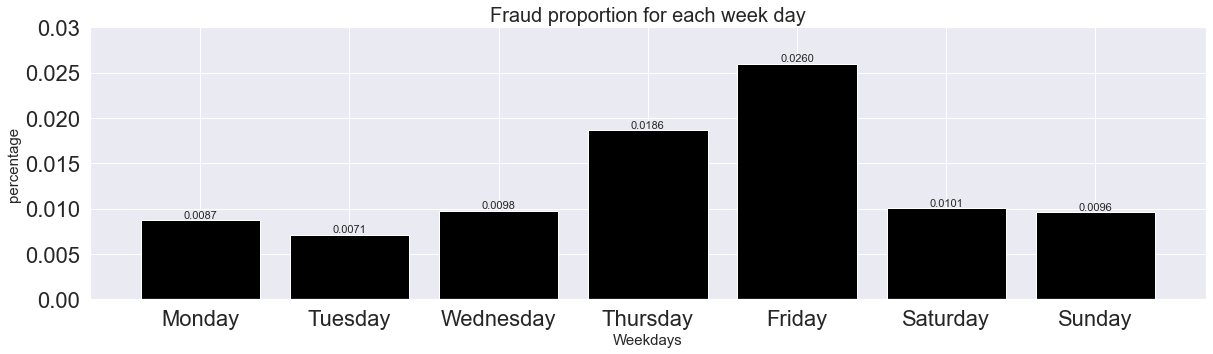

In [343]:
tickpositions=[0.00,0.005,0.010,0.015,0.020,0.025,0.03]
ticklabels=['0.00','0.005','0.010','0.015','0.020','0.025','0.03']
fig = plt.figure()
plt.figure(figsize=(20,5))
plt.bar(df1['dow'],df1['dow_risk'],color='black')
plt.xlabel('Weekdays',fontsize=15)
plt.ylabel('percentage',fontsize=15)
plt.title('Fraud proportion for each week day',fontsize=20)
#avg_percentage=df1['dow_risk'].mean()
#plt.axhline(y=avg_percentage,color='green',linestyle='--')
#plt.annotate('Avg.Fraud',(0,0.011),color='green',fontsize=12)


plt.ylim(0.0130, 0.0160)
plt.yticks(tickpositions,ticklabels)
for a,b in zip(df1['dow'],df1['dow_risk']):
    plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()

# Feature Selection

In [23]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df



def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))

In [2]:
df=pd.read_csv('final.csv',index_col=0)

C:\Users\jiaoy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_me

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 689 entries, Recnum to merchdes_state_count_1_by_30
dtypes: float64(606), int64(69), object(14)
memory usage: 507.5+ MB


In [58]:
df.columns.get_loc('Cardnum_day_since')

18

In [4]:
df_prepare = pd.concat([df[['Fraud']], df.iloc[:,18:]], axis = 1)
df_prepare

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/me

In [5]:
# z-scale the numerical variables
df_scaled = df_prepare.apply(zscore)
df_scaled['Fraud'] = df_prepare['Fraud']

df_scaled

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/me

In [8]:
df_scaled = optimize(df_scaled)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 672 entries, Fraud to merchdes_state_count_1_by_30
dtypes: float32(671), int8(1)
memory usage: 247.6 MB


In [10]:
df_oot = df_scaled.loc[(df['Date'] >= '2010-11-01')]
df_modeling_scaled = df_scaled.loc[((df['Date'] < '2010-11-01') & (df['Date'] > '2010-01-14'))]

In [11]:
data = deepcopy(df_modeling_scaled)

In [352]:
df_oot.to_csv('df_oot.csv')
df_modeling_scaled.to_csv('df_modeling_scaled.csv')

In [12]:
good_ind = np.where(data['Fraud'] == 0)
bad_ind = np.where(data['Fraud'] == 1)
good = data.iloc[good_ind]
bad = data.iloc[bad_ind]

In [13]:
KSFDR = np.zeros([2, data.shape[1]])
numbads = data['Fraud'].sum()
topRows = int(round(len(data)*0.03))
print('Top 3% rows:',topRows)
print('No of frauds',numbads)

start_time = pd.datetime.now()

j = 0
for column in data:
#     KS statistic
    KSFDR[0][j] = stats.ks_2samp(good[column],bad[column])[0]
#     FDR
    temp = data.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR[1][j] = FDRate
    j = j +1
print('duration: ', pd.datetime.now() - start_time)

Top 3% rows: 2419
No of frauds 868


<ipython-input-13-ac57625550ba>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


duration:  0:01:50.251243


<ipython-input-13-ac57625550ba>:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print('duration: ', pd.datetime.now() - start_time)


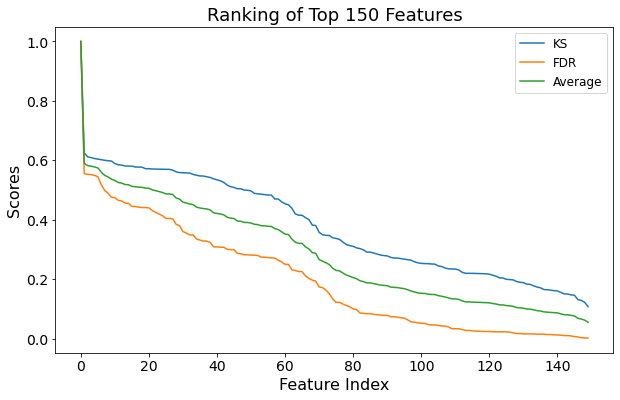

In [14]:
plt.figure(figsize=(10,6))
plt.plot(-np.sort(-KSFDR[0][:150]), label='KS')
plt.plot(-np.sort(-KSFDR[1][:150]), label='FDR')
plt.plot((-np.sort(-KSFDR[0][:150])-np.sort(-KSFDR[1][:150]))/2, label='Average')

plt.title("Ranking of Top 150 Features",fontsize= 18)
plt.ylabel('Scores',fontsize=16)
plt.xlabel("Feature Index",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [15]:
col_name_red = data.columns
res_df_prof = pd.DataFrame.from_dict({'KS':KSFDR[0][:],'FDR':KSFDR[1][:]},orient='index',
                       columns=col_name_red)

In [16]:
res_df_prof = res_df_prof.transpose()
res_df_prof['Avg'] = res_df_prof.mean(axis = 1)
res_df_prof['KS Rank'] = res_df_prof['KS'].rank(ascending = False)
res_df_prof['FDR Rank'] = res_df_prof['FDR'].rank(ascending=False)
res_df_prof['Average Rank'] = res_df_prof[['KS Rank','FDR Rank']].mean(axis = 1)
res_df_prof_filter = res_df_prof.sort_values(by='Average Rank',ascending=True)
# res_df_filter = res_df_filter.drop(columns='rank_avg')
res_df_prof_filter

,KS,FDR,Avg,KS Rank,FDR Rank,Average Rank
Fraud,1.000000,1.000000,1.000000,1.0,1.0,1.00
cardnum_zip_total_7,0.685118,0.634793,0.659955,2.0,6.0,4.00
cardnum_zip_total_3,0.677772,0.637097,0.657435,4.0,4.0,4.00
cardnum_merch_total_7,0.681401,0.633641,0.657521,3.0,7.0,5.00
cardnum_merchdes_total_7,0.671453,0.638249,0.654851,9.0,3.0,6.00
...,...,...,...,...,...,...
merchdes_state_actual/toal_30,0.133575,0.008065,0.070820,624.0,657.5,640.75
merchnum_zip_count_1_by_14,0.122437,0.012673,0.067555,643.0,640.5,641.75
merchdes_zip_actual/max_7,0.115809,0.013825,0.064817,652.0,633.5,642.75
merchnum_state_count_0_by_30,0.105568,0.013825,0.059696,658.0,633.5,645.75


In [361]:
#res_df_prof_filter.to_csv('feature selection.csv')

In [17]:
Y_labels = df_modeling_scaled['Fraud']
features_chosen_filter = res_df_prof_filter.index.values[1:81] #1st column is the fraud label
features_chosen_filter

array(['cardnum_zip_total_7', 'cardnum_zip_total_3',
       'cardnum_merch_total_7', 'cardnum_merchdes_total_7',
       'cardnum_merch_total_14', 'cardnum_merch_total_3',
       'cardnum_merchdes_total_3', 'cardnum_state_total_3',
       'cardnum_merchdes_total_14', 'cardnum_zip_total_14',
       'cardnum_state_total_7', 'cardnum_state_total_1',
       'cardnum_zip_total_1', 'cardnum_merch_total_1',
       'cardnum_merch_total_30', 'cardnum_merchdes_total_30',
       'cardnum_state_total_14', 'cardnum_merchdes_total_1',
       'cardnum_zip_total_30', 'cardnum_merchdes_max_14',
       'cardnum_zip_max_14', 'cardnum_state_total_0',
       'cardnum_merch_total_0', 'cardnum_zip_max_30',
       'cardnum_merchdes_total_0', 'cardnum_state_max_7',
       'cardnum_zip_total_0', 'cardnum_merchdes_max_3',
       'cardnum_merch_max_14', 'cardnum_state_max_14',
       'cardnum_merchdes_max_30', 'cardnum_merch_max_30',
       'cardnum_merchdes_max_7', 'cardnum_zip_max_7',
       'cardnum_merch_max_3

In [ ]:
X_data = df_modeling_scaled[features_chosen_filter]
print(X_data.shape)
X_data.head()

In [364]:
#X_data.to_csv('features after filter.csv')

## forward selection

In [22]:
#!pip install mlxtend

In [24]:

def custom_FDR(y_true, y_scores):
    res_df = pd.DataFrame({'score':y_scores,'label': y_true}).sort_values(by='score',ascending=False)
    top3_res1 = res_df.head(round(y_true.shape[0]*0.03))
    return (top3_res1['label'].sum()/sum(y_true))

my_fdr_metric = make_scorer(custom_FDR, greater_is_better=True,needs_proba = True)

In [25]:
def fdr(classifier,x,y,cutoff=0.03):
    return fdr_prob(y,classifier.predict_proba(x),cutoff)
def fdr_prob(y,y_prob,cutoff=0.03):
    if len(y_prob.shape)!=1:
        y_prob=y_prob[:,-1:]
    num_fraud=len(y[y==1])
    sorted_prob=np.asarray(sorted(zip(y_prob,y),key=lambda x:x[0],reverse=True))
    cutoff_bin=sorted_prob[0:int(len(y)*cutoff),1:]
    return len(cutoff_bin[cutoff_bin==1])/num_fraud

### Trial 1

In [35]:

clf = RandomForestClassifier(n_estimators=150, n_jobs=-1)
sfs1 = SFS(clf,
           k_features=79,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0,n_jobs=-1)
sfs1.fit(X_data,Y_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.6min finished

[2021-05-01 21:02:04] Features: 1/79 -- score: 0.9995163210635976[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:  8.0min finished

[2021-05-01 21:10:06] Features: 2/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:  8.0min finished

[2021-05-01 21:18:06] Features: 3/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed: 13.6min finis

[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed: 20.5min finished

[2021-05-02 06:19:58] Features: 32/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 19.1min finished

[2021-05-02 06:39:07] Features: 33/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed: 18.6min finished

[2021-05-02 06:57:45] Features: 34/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed: 18.5min finished

[2021-05-02 07:16:18] Features: 35/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 10.3min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.0min finished

[2021-05-02 15:40:19] Features: 66/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:  5.8min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed: 10.3min finished

[2021-05-02 15:50:35] Features: 67/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:  5.8min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  9.5min finished

[2021-05-02 16:00:07] Features: 68/79 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  5.8min remaining: 11.6min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.9min finished

[2021-0

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(n_estimators=150,
                                                           n_jobs=-1),
                          k_features=79, n_jobs=-1, scoring='accuracy',
                          verbose=2)

### Trial 2

In [87]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=12)
model2=LogisticRegression(penalty='l2',class_weight='balanced')
sfs=SFS(model2,k_features=79,forward=True,verbose=2,scoring='accuracy',cv=0,n_jobs=-1)
sfs.fit(X_data,Y_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.5s finished

[2021-05-01 15:43:04] Features: 1/79 -- score: 0.9257457614993919[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    4.9s finished

[2021-05-01 15:43:09] Features: 2/79 -- score: 0.9361470777594963[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    4.6s finished

[2021-05-01 15:43:14] Features: 3/79 -- score: 0.9365906001859933[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  77 out o

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.5s finished

[2021-05-01 15:51:08] Features: 31/79 -- score: 0.9491809142284856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   18.2s finished

[2021-05-01 15:51:26] Features: 32/79 -- score: 0.949252450103727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   20.7s finished

[2021-05-01 15:51:47] Features: 33/79 -- score: 0.9491236855282924[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   21.3s finished

[2021-05-01 15:52:09] Features: 34/79 -

[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   10.3s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   13.1s finished

[2021-05-01 16:00:20] Features: 63/79 -- score: 0.9487373918019887[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    4.9s remaining:    2.6s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=0,
                          estimator=LogisticRegression(class_weight='balanced'),
                          k_features=79, n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [88]:
sfs.k_feature_names_

('cardnum_zip_total_7',
 'cardnum_merch_total_7',
 'cardnum_zip_total_3',
 'cardnum_merch_total_3',
 'cardnum_state_total_7',
 'cardnum_state_total_3',
 'cardnum_state_total_1',
 'cardnum_zip_total_1',
 'cardnum_merch_total_1',
 'cardnum_zip_max_14',
 'cardnum_merch_max_14',
 'cardnum_zip_max_7',
 'cardnum_merch_max_7',
 'cardnum_state_max_3',
 'cardnum_merch_total_0',
 'cardnum_merch_max_30',
 'cardnum_state_total_0',
 'Cardnum_total_3',
 'cardnum_zip_total_0',
 'cardnum_zip_max_30',
 'cardnum_state_max_14',
 'cardnum_state_max_7',
 'cardnum_merch_max_3',
 'Cardnum_total_7',
 'merchnum_state_total_0',
 'merchnum_zip_total_0',
 'Merchnum_total_0',
 'cardnum_state_max_1',
 'Cardnum_total_1',
 'cardnum_merch_max_1',
 'cardnum_zip_max_1',
 'merchnum_zip_total_1',
 'cardnum_state_max_30',
 'merchnum_state_total_1',
 'Merchnum_total_1',
 'merchnum_zip_max_1',
 'merchnum_zip_total_3',
 'merchnum_state_total_3',
 'Merchnum_total_3',
 'Cardnum_total_0',
 'cardnum_zip_max_0',
 'cardnum_state_ma

In [89]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)",[0.9257457614993919],0.925746,"(cardnum_state_total_7,)",NaN,0,NaN
2,"(6, 34)",[0.9361470777594963],0.936147,"(cardnum_state_total_7, Cardnum_total_1)",NaN,0,NaN
3,"(6, 34, 40)",[0.9365906001859933],0.936591,"(cardnum_state_total_7, Cardnum_total_1, merch...",NaN,0,NaN
4,"(6, 34, 40, 67)",[0.9386794477430431],0.938679,"(cardnum_state_total_7, Cardnum_total_1, merch...",NaN,0,NaN
5,"(6, 34, 40, 54, 67)",[0.9398812504470992],0.939881,"(cardnum_state_total_7, Cardnum_total_1, merch...",NaN,0,NaN
6,"(0, 6, 34, 40, 54, 67)",[0.9438729522855712],0.943873,"(cardnum_zip_total_7, cardnum_state_total_7, C...",NaN,0,NaN
7,"(0, 6, 34, 40, 54, 66, 67)",[0.9451462908648687],0.945146,"(cardnum_zip_total_7, cardnum_state_total_7, C...",NaN,0,NaN
8,"(0, 6, 34, 40, 54, 60, 66, 67)",[0.945661349166607],0.945661,"(cardnum_zip_total_7, cardnum_state_total_7, C...",NaN,0,NaN
9,"(0, 6, 34, 40, 49, 54, 60, 66, 67)",[0.9458902639673796],0.94589,"(cardnum_zip_total_7, cardnum_state_total_7, C...",NaN,0,NaN
10,"(0, 6, 34, 40, 49, 54, 57, 60, 66, 67)",[0.9462336361685385],0.946234,"(cardnum_zip_total_7, cardnum_state_total_7, C...",NaN,0,NaN


C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


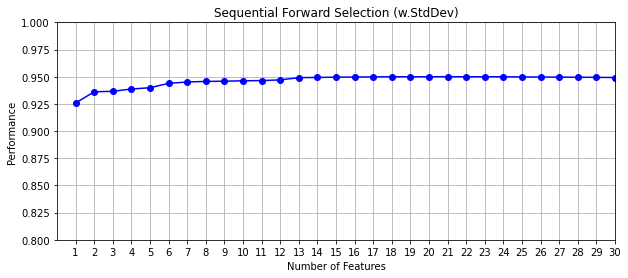

In [90]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1=plot_sfs(sfs.get_metric_dict(),
             kind='std_err',
             figsize=(10,4))
plt.ylim([.8,1])
plt.xlim(0,30)
plt.title('Sequential Forward Selection (w.StdDev)')
plt.grid()
plt.show()

In [91]:
var_SBS=pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
var_SBS

In [ ]:
#var_SBS.to_csv('varsFS.csv',index=False)

### Final one

In [365]:
model=LogisticRegression(penalty='l2',class_weight='balanced',max_iter=10000)
sfs=SFS(model,k_features=79,forward=True,verbose=2,scoring='roc_auc',cv=0)
sfs.fit(X_data,Y_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.4s finished

[2021-05-11 05:38:22] Features: 1/79 -- score: 0.9196545202933908[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    8.6s finished

[2021-05-11 05:38:30] Features: 2/79 -- score: 0.9269566707963608[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    9.6s finished

[2021-05-11 05:38:40] Features: 3/79 -- score: 0.9348256720805639[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  1.4min finished

[2021-05-11 06:02:25] Features: 28/79 -- score: 0.9569076485886823[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:  1.9min finished

[2021-05-11 06:04:18] Features: 29/79 -- score: 0.957082834164934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:  4.0min finished

[2021-05-11 06:08:19] Features: 30/79 -- score: 0.9572098361248633[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.0min finished

[2021-05-11 06:12:21] Features: 31/7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.2min finished

[2021-05-11 08:12:49] Features: 56/79 -- score: 0.9590377876255692[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.0min finished

[2021-05-11 08:16:48] Features: 57/79 -- score: 0.9590380909397006[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  2.5min finished

[2021-05-11 08:19:17] Features: 58/79 -- score: 0.9590366610302234[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done

SequentialFeatureSelector(cv=0,
                          estimator=LogisticRegression(class_weight='balanced',
                                                       max_iter=10000),
                          k_features=79, scoring='roc_auc', verbose=2)

C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


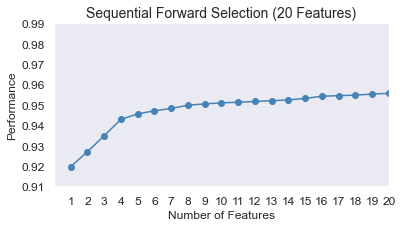

In [367]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1=plot_sfs(sfs.get_metric_dict(),
             kind='std_err',
             figsize=(6,3),color= 'steelblue')
plt.ylim([.91,0.99])
plt.xlim(0,20)
plt.title('Sequential Forward Selection (20 Features)',fontsize= 14)
plt.xlabel("Number of Features",fontsize=12)
plt.ylabel("Performance",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

y_major_locator=MultipleLocator(0.01)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.grid()
plt.show()

In [368]:
var_SBS=pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jiaoy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


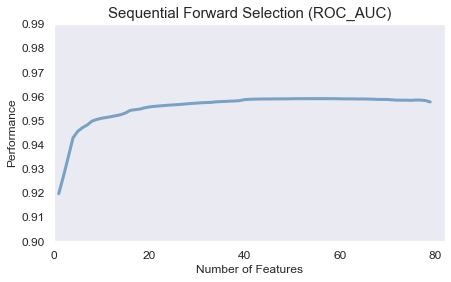

In [369]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(7,4))
plt.plot(var_SBS['avg_score'],color= 'steelblue', linewidth=3, alpha=0.7)
plt.title("Sequential Forward Selection (ROC_AUC)",  fontsize=15)
plt.xlabel("Number of Features",fontsize=12)
plt.ylabel("Performance",fontsize=12)
plt.ylim([.90,0.99])
plt.xlim([0,82])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
y_major_locator=MultipleLocator(0.01)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.grid()
plt.show()

# Models

In [373]:
final_wrapper_columns = var_SBS.feature_names.values[19]
final_wrapper_columns

('cardnum_zip_total_7',
 'cardnum_merchdes_total_7',
 'cardnum_state_total_3',
 'cardnum_merchdes_total_14',
 'cardnum_zip_total_14',
 'cardnum_state_total_7',
 'cardnum_merch_total_1',
 'cardnum_merch_total_30',
 'cardnum_merchdes_max_14',
 'cardnum_merchdes_total_0',
 'cardnum_state_max_7',
 'cardnum_merch_max_14',
 'Cardnum_total_7',
 'merchnum_zip_total_1',
 'merchdes_state_total_0',
 'merchdes_zip_max_0',
 'merchdes_zip_total_0',
 'merchdes_zip_max_1',
 'Cardnum_total_0',
 'cardnum_merchdes_max_0')

In [375]:
final_wrapper_columns=[]
for i in var_SBS.feature_names.values[19]:
    final_wrapper_columns.append(i)
final_wrapper_columns=np.array(final_wrapper_columns)
final_wrapper_columns


array(['cardnum_zip_total_7', 'cardnum_merchdes_total_7',
       'cardnum_state_total_3', 'cardnum_merchdes_total_14',
       'cardnum_zip_total_14', 'cardnum_state_total_7',
       'cardnum_merch_total_1', 'cardnum_merch_total_30',
       'cardnum_merchdes_max_14', 'cardnum_merchdes_total_0',
       'cardnum_state_max_7', 'cardnum_merch_max_14', 'Cardnum_total_7',
       'merchnum_zip_total_1', 'cardnum_merch_max_1',
       'merchdes_state_total_0', 'Merch description_max_0',
       'merchdes_zip_max_0', 'merchdes_zip_total_0', 'merchdes_zip_max_1',
       'Cardnum_total_0', 'cardnum_merchdes_max_0'], dtype='<U25')

In [30]:
'''
# or
df_modeling_scaled=pd.read_csv('df_modeling_scaled.csv',index_col=0)
df_oot=pd.read_csv('df_oot.csv',index_col=0)
final_wrapper_columns=['cardnum_zip_total_7',
 'cardnum_merchdes_total_7',
 'cardnum_state_total_3',
 'cardnum_merchdes_total_14',
 'cardnum_zip_total_14',
 'cardnum_state_total_7',
 'cardnum_merch_total_1',
 'cardnum_merch_total_30',
 'cardnum_merchdes_max_14',
 'cardnum_merchdes_total_0',
 'cardnum_state_max_7',
 'cardnum_merch_max_14',
 'Cardnum_total_7',
 'merchnum_zip_total_1',
 'merchdes_state_total_0',
 'merchdes_zip_max_0',
 'merchdes_zip_total_0',
 'merchdes_zip_max_1',
 'Cardnum_total_0',
 'cardnum_merchdes_max_0']'''

In [32]:
#df_modeling_scaled=pd.read_csv('df_modeling_scaled.csv')
#df_oot=pd.read_csv('df_oot.csv')

# or

X_models = df_modeling_scaled[final_wrapper_columns] # training set
Y_labels = df_modeling_scaled['Fraud'] #labels
X_oot_orig = df_oot[final_wrapper_columns] #OOT set
Y_oot_orig = df_oot['Fraud']

## Logistic Regression


In [50]:

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    clf = LogisticRegressionCV(cv=10,Cs=[0.01],max_iter=1000)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    clf.fit(X_trn,Y_trn.values.ravel())
    predictions=clf.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=clf.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=clf.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])

0 0.5559380378657487 0.6024590163934426 0.3684210526315789
1 0.5343915343915344 0.5658914728682171 0.391812865497076
2 0.5529622980251346 0.5671641791044776 0.36257309941520466
3 0.5565217391304348 0.572 0.3742690058479532
4 0.5555555555555556 0.5468164794007491 0.38596491228070173
5 0.5741710296684118 0.5436507936507936 0.3742690058479532
6 0.5484949832775919 0.5022026431718062 0.3333333333333333
7 0.5397631133671743 0.5683760683760684 0.3508771929824561
8 0.5932773109243697 0.5 0.3742690058479532
9 0.545144804088586 0.5546218487394958 0.3333333333333333


In [51]:
FDR3.mean()


trn    0.555622
tst    0.552318
oot    0.364912
dtype: float64

## KNN

In [33]:
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    knn_8 = KNeighborsClassifier(n_neighbors=50)# tried n_neighbors from 5 to 50, 50 has the best result
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    knn_8.fit(X_trn,Y_trn.values.ravel())
    predictions=knn_8.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=knn_8.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=knn_8.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
print(FDR3.mean())

0 0.8409475465313029 0.7978339350180506 0.5418994413407822
1 0.8460264900662252 0.7954545454545454 0.5363128491620112
2 0.8303425774877651 0.8 0.547486033519553
3 0.8357487922705314 0.8380566801619433 0.5307262569832403
4 0.8425460636515912 0.7933579335793358 0.553072625698324
5 0.8460264900662252 0.7803030303030303 0.5307262569832403
6 0.8327868852459016 0.8217054263565892 0.547486033519553
7 0.8470394736842105 0.7961538461538461 0.5586592178770949
8 0.8349358974358975 0.7991803278688525 0.5418994413407822
9 0.8556701030927835 0.8006993006993007 0.5195530726256983
trn    0.841207
tst    0.802275
oot    0.540782
dtype: float64


## Decision Tree

In [40]:


X_models = df_modeling_scaled[final_wrapper_columns] # training set
Y_labels = df_modeling_scaled['Fraud'] #labels
X_oot_orig = df_oot[final_wrapper_columns] #OOT set
Y_oot_orig = df_oot['Fraud']

In [41]:
# predictor and response variables

df_train_X = X_models
df_train_Y = Y_labels
df_oot_X = X_oot_orig
df_oot_Y = Y_oot_orig

In [42]:
# test run a single model
X_trn, X_tst, Y_trn, Y_tst = train_test_split(df_train_X, df_train_Y, train_size = 0.7, test_size = 0.3)
tree_clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 7, random_state = None)
tree_clf.fit(X_trn, Y_trn)

DecisionTreeClassifier(max_depth=7)

In [44]:

    
result=[]   
for d in range(4,12):

    print(f'-------- fitting for depth: {d} --------')
    FDR3 = pd.DataFrame(columns = ['trn', 'tst', 'oot'])

    for niter in range(10):

        X_trn,X_tst,Y_trn,Y_tst=train_test_split(df_train_X, df_train_Y, train_size = 0.8, test_size = 0.2)
        tree_clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = d, random_state = None)

        """X_trn_array=X_trn.values
        X_tst_array=X_tst.values
        X_oot_array=df_oot_X.values
        Y_trn_array=Y_trn.values
        Y_tst_array=Y_tst.values
        Y_oot_array=df_oot_Y.values"""


        X_trn_eval=X_trn.copy()
        X_tst_eval=X_tst.copy()
        X_oot=df_oot_X.copy()
        X_oot_eval=df_oot_X.copy()


        tree_clf.fit(X_trn,Y_trn.values.ravel())
        predictions=tree_clf.predict_proba(X_trn)[:,1]

        X_trn_eval['predicted']=predictions
        X_trn_eval['Fraud']=Y_trn
        topRows=int(round(X_trn_eval.shape[0]*0.03))
        temp=X_trn_eval.sort_values('predicted', ascending=False).head(topRows)
        needed=temp.loc[:,'Fraud']
        FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

        predictions=tree_clf.predict_proba(X_tst)[:,1]

        X_tst_eval['predicted']=predictions
        X_tst_eval['Fraud']=Y_tst
        topRows=int(round(X_tst_eval.shape[0]*0.03))
        temp=X_tst_eval.sort_values('predicted', ascending=False).head(topRows)
        needed=temp.loc[:,'Fraud']
        FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

        predictions=tree_clf.predict_proba(X_oot)[:,1]

        X_oot_eval['predicted']=predictions
        X_oot_eval['Fraud']=df_oot_Y
        topRows=int(round(X_oot_eval.shape[0]*0.03))
        temp=X_oot_eval.sort_values('predicted', ascending=False).head(topRows)
        needed=temp.loc[:,'Fraud']
        FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])

        print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
    row = FDR3.mean().to_list()
    row.insert(0, d)
    result.append(row)

-------- fitting for depth: 4 --------
0 0.6109510086455331 0.5804597701149425 0.33519553072625696
1 0.65625 0.5304878048780488 0.21787709497206703
2 0.6341829085457271 0.4626865671641791 0.2122905027932961
3 0.6332335329341318 0.62 0.2122905027932961
4 0.6507246376811594 0.6853932584269663 0.25139664804469275
5 0.6367583212735166 0.6271186440677966 0.2569832402234637
6 0.6061946902654868 0.6052631578947368 0.33519553072625696
7 0.5572842998585573 0.4782608695652174 0.19553072625698323
8 0.6592592592592592 0.5751295336787565 0.26256983240223464
9 0.6353111432706223 0.6497175141242938 0.2681564245810056
-------- fitting for depth: 5 --------
0 0.6846038863976084 0.6130653266331658 0.2681564245810056
1 0.7159590043923866 0.6594594594594595 0.3240223463687151
2 0.6419400855920114 0.5988023952095808 0.30726256983240224
3 0.6671428571428571 0.6547619047619048 0.2849162011173184
4 0.692524682651622 0.660377358490566 0.3575418994413408
5 0.6547619047619048 0.6530612244897959 0.340782122905027

## Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [54]:
# Random Forest 1
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 20, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7671232876712328 0.7136929460580913 0.42105263157894735
1 0.768566493955095 0.7357723577235772 0.38596491228070173
2 0.7214532871972318 0.7206477732793523 0.3742690058479532
3 0.7393526405451448 0.6764705882352942 0.391812865497076
4 0.7675213675213676 0.7083333333333334 0.4269005847953216
5 0.75809199318569 0.7310924369747899 0.391812865497076
6 0.7737478411053541 0.7479674796747967 0.4444444444444444
7 0.7441860465116279 0.6954887218045113 0.43859649122807015
8 0.7677642980935875 0.7620967741935484 0.4152046783625731
9 0.7590987868284229 0.7298387096774194 0.4152046783625731


trn    0.756691
tst    0.722140
oot    0.410526
dtype: float64

In [55]:
# Random Forest 2
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 6,
                                            n_estimators = 20, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7631133671742809 0.7222222222222222 0.4152046783625731
1 0.7710843373493976 0.6762295081967213 0.42105263157894735
2 0.7859531772575251 0.7577092511013216 0.4152046783625731
3 0.765993265993266 0.7445887445887446 0.42105263157894735
4 0.7478260869565218 0.74 0.391812865497076
5 0.7673611111111112 0.6666666666666666 0.4093567251461988
6 0.7346221441124781 0.7109375 0.38596491228070173
7 0.7367521367521368 0.6666666666666666 0.39766081871345027
8 0.7482014388489209 0.7360594795539034 0.42105263157894735
9 0.7473498233215548 0.7181467181467182 0.4269005847953216


trn    0.756826
tst    0.713923
oot    0.410526
dtype: float64

In [56]:
# Random Forest 3
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 30, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7774030354131535 0.7370689655172413 0.42105263157894735
1 0.761437908496732 0.7136150234741784 0.391812865497076
2 0.7814113597246127 0.7213114754098361 0.4269005847953216
3 0.774526678141136 0.7418032786885246 0.42105263157894735
4 0.7832764505119454 0.7615062761506276 0.3742690058479532
5 0.7561837455830389 0.7027027027027027 0.40350877192982454
6 0.7675675675675676 0.737037037037037 0.39766081871345027
7 0.7846153846153846 0.7666666666666667 0.42105263157894735
8 0.757679180887372 0.7280334728033473 0.40350877192982454
9 0.7711864406779662 0.7489361702127659 0.38596491228070173


trn    0.771529
tst    0.735868
oot    0.404678
dtype: float64

In [377]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 50, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7711442786069652 0.7320754716981132 0.547486033519553
1 0.7848932676518884 0.752895752895753 0.5698324022346368
2 0.778675282714055 0.7791164658634538 0.5810055865921788
3 0.7412935323383084 0.6943396226415094 0.48044692737430167
4 0.7676282051282052 0.7459016393442623 0.5698324022346368
5 0.7774193548387097 0.7580645161290323 0.5586592178770949
6 0.7649918962722853 0.7569721115537849 0.5083798882681564
7 0.7576736672051696 0.7269076305220884 0.5810055865921788
8 0.7672849915682968 0.7636363636363637 0.547486033519553
9 0.7624398073836276 0.7387755102040816 0.5251396648044693


trn    0.767344
tst    0.744869
oot    0.546927
dtype: float64

In [378]:
# Random Forest 5
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.8928571428571429 0.7777777777777778 0.5921787709497207
1 0.8870151770657673 0.850909090909091 0.6256983240223464
2 0.8726114649681529 0.8208333333333333 0.5865921787709497
3 0.8913043478260869 0.7814814814814814 0.6201117318435754
4 0.8943894389438944 0.8129770992366412 0.6145251396648045
5 0.8744038155802861 0.8284518828451883 0.6256983240223464
6 0.886762360446571 0.8506224066390041 0.5921787709497207
7 0.8564102564102564 0.8268551236749117 0.6145251396648045
8 0.8672131147540983 0.8527131782945736 0.6089385474860335
9 0.8876033057851239 0.7946768060836502 0.5754189944134078


trn    0.881057
tst    0.819730
oot    0.605587
dtype: float64

In [90]:
# random forest 6

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
FDR_final = pd.DataFrame(columns=['Random forest','n_estimators','max_depth','avg_trn', 'avg_tst', 'avg_oot'])


rate=[0.06,0.12,0.25]
estimators=[60,120,230,600,1100]
depth=[7,15,25,30]


num=0
#for r in rate:
for n in estimators:
    for d in depth:
        for niter in range(10):



            X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

            random_forest = RandomForestClassifier(n_estimators=n,max_depth=d)

            X_trn_array=X_trn.values
            X_tst_array=X_tst.values
            X_oot_array=X_oot_orig.values
            Y_trn_array=Y_trn.values
            Y_tst_array=Y_tst.values
            Y_oot_array=Y_oot_orig.values

            X_oot=X_oot_orig.copy()
            X_trn_eval=X_trn.copy()
            X_tst_eval=X_tst.copy()
            X_oot_eval=X_oot.copy()


            random_forest.fit(X_trn,Y_trn)
            predictions=random_forest.predict_proba(X_trn)[:,1]

            X_trn_eval['predicted']=predictions
            X_trn_eval['Fraud']=Y_trn
            topRows=int(round(X_trn_eval.shape[0]*0.03))
            temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
            needed=temp.loc[:,'Fraud']
            FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

            predictions=random_forest.predict_proba(X_tst)[:,1]

            X_tst_eval['predicted']=predictions
            X_tst_eval['Fraud']=Y_tst
            topRows=int(round(X_tst_eval.shape[0]*0.03))
            temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
            needed=temp.loc[:,'Fraud']
            FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

            predictions=random_forest.predict_proba(X_oot)[:,1]

            X_oot_eval['predicted']=predictions
            X_oot_eval['Fraud']=Y_oot_orig
            topRows=int(round(X_oot_eval.shape[0]*0.03))
            temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
            needed=temp.loc[:,'Fraud']
            FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
            #print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])


        # Final Dataframe 
        FDR_final.loc[num,'Random forest']=num+1
        #FDR_final.loc[num,'learning_rate']=r
        FDR_final.loc[num,'n_estimators']=n
        FDR_final.loc[num,'max_depth']=d
        FDR_final.loc[num,'avg_trn']=FDR3['trn'].mean()
        FDR_final.loc[num,'avg_tst']=FDR3['tst'].mean()
        FDR_final.loc[num,'avg_oot']=FDR3['oot'].mean()

        # Result for every model 
        print(num,r,n,d,FDR_final.loc[num,'avg_trn'])
        print(num,r,n,d,FDR_final.loc[num,'avg_tst'])
        print(num,r,n,d,FDR_final.loc[num,'avg_oot'])
        print('Next')
        num=num+1

0 0.25 60 7 0.8279717587418693
0 0.25 60 7 0.7861641277539948
0 0.25 60 7 0.5726256983240223
Next
1 0.25 60 15 0.9945499864721082
1 0.25 60 15 0.8306728436173776
1 0.25 60 15 0.6005586592178771
Next
2 0.25 60 25 1.0
2 0.25 60 25 0.8500911231402654
2 0.25 60 25 0.5938547486033519
Next
3 0.25 60 30 1.0
3 0.25 60 30 0.8449983113486867
3 0.25 60 30 0.5972067039106145
Next
4 0.25 120 7 0.8342953580424673
4 0.25 120 7 0.7728190709149071
4 0.25 120 7 0.5837988826815642
Next
5 0.25 120 15 0.9978801394816339
5 0.25 120 15 0.8473212886446021
5 0.25 120 15 0.6195530726256984
Next
6 0.25 120 25 1.0
6 0.25 120 25 0.8520926358758801
6 0.25 120 25 0.6100558659217877
Next
7 0.25 120 30 1.0
7 0.25 120 30 0.8601251118345248
7 0.25 120 30 0.6033519553072626
Next
8 0.25 230 7 0.8362213341920398
8 0.25 230 7 0.7857111705510456
8 0.25 230 7 0.5810055865921786
Next
9 0.25 230 15 0.998526199410547
9 0.25 230 15 0.855833421555967
9 0.25 230 15 0.6245810055865924
Next
10 0.25 230 25 1.0
10 0.25 230 25 0.8582917

In [92]:
# random forest 7

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
FDR_final = pd.DataFrame(columns=['Random forest','n_estimators','max_depth','avg_trn', 'avg_tst', 'avg_oot'])


rate=[0.06,0.12,0.25]
estimators=[93]
depth=[13]


num=0
#for r in rate:
for n in estimators:
    for d in depth:
        for niter in range(10):



            X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

            random_forest = RandomForestClassifier(n_estimators=n,max_depth=d)

            X_trn_array=X_trn.values
            X_tst_array=X_tst.values
            X_oot_array=X_oot_orig.values
            Y_trn_array=Y_trn.values
            Y_tst_array=Y_tst.values
            Y_oot_array=Y_oot_orig.values

            X_oot=X_oot_orig.copy()
            X_trn_eval=X_trn.copy()
            X_tst_eval=X_tst.copy()
            X_oot_eval=X_oot.copy()


            random_forest.fit(X_trn,Y_trn)
            predictions=random_forest.predict_proba(X_trn)[:,1]

            X_trn_eval['predicted']=predictions
            X_trn_eval['Fraud']=Y_trn
            topRows=int(round(X_trn_eval.shape[0]*0.03))
            temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
            needed=temp.loc[:,'Fraud']
            FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

            predictions=random_forest.predict_proba(X_tst)[:,1]

            X_tst_eval['predicted']=predictions
            X_tst_eval['Fraud']=Y_tst
            topRows=int(round(X_tst_eval.shape[0]*0.03))
            temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
            needed=temp.loc[:,'Fraud']
            FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

            predictions=random_forest.predict_proba(X_oot)[:,1]

            X_oot_eval['predicted']=predictions
            X_oot_eval['Fraud']=Y_oot_orig
            topRows=int(round(X_oot_eval.shape[0]*0.03))
            temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
            needed=temp.loc[:,'Fraud']
            FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
            #print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])


        # Final Dataframe 
        FDR_final.loc[num,'Random forest']=num+1
        #FDR_final.loc[num,'learning_rate']=r
        FDR_final.loc[num,'n_estimators']=n
        FDR_final.loc[num,'max_depth']=d
        FDR_final.loc[num,'avg_trn']=FDR3['trn'].mean()
        FDR_final.loc[num,'avg_tst']=FDR3['tst'].mean()
        FDR_final.loc[num,'avg_oot']=FDR3['oot'].mean()

        # Result for every model 
        print(num,r,n,d,FDR_final.loc[num,'avg_trn'])
        print(num,r,n,d,FDR_final.loc[num,'avg_tst'])
        print(num,r,n,d,FDR_final.loc[num,'avg_oot'])
        print('Next')
        num=num+1

0 0.25 93 13 0.9718731050832456
0 0.25 93 13 0.8359211459390246
0 0.25 93 13 0.6139664804469274
Next


## Boosted Tree

In [ ]:
final_wrapper_columns = var_SBS.feature_names.values[19]
final_wrapper_columns

In [76]:
#df_modeling_scaled=pd.read_csv('df_modeling_scaled.csv')
#df_oot=pd.read_csv('df_oot.csv')
# orfinal_wrapper_columns=['cardnum_zip_total_7', 'cardnum_merchdes_total_7', 'cardnum_state_total_3', 'cardnum_merchdes_total_14', 'cardnum_zip_total_14', 'cardnum_state_total_7', 'cardnum_merch_total_1', 'cardnum_merch_total_30', 'cardnum_merchdes_max_14', 'cardnum_merchdes_total_0', 'cardnum_state_max_7', 'cardnum_merch_max_14', 'Cardnum_total_7', 'merchnum_zip_total_1', 'merchdes_state_total_0', 'merchdes_zip_max_0', 'merchdes_zip_total_0', 'merchdes_zip_max_1', 'Cardnum_total_0', 'cardnum_merchdes_max_0']

X_models = df_modeling_scaled[final_wrapper_columns] # training set
Y_labels = df_modeling_scaled['Fraud'] #labels
X_oot_orig = df_oot[final_wrapper_columns] #OOT set
Y_oot_orig = df_oot['Fraud']



### gridsearch :  (too too slow)

In [80]:
FDR_bt = pd.DataFrame(columns=['trn', 'tst', 'oot'])

xgbClass =  XGBClassifier(objective='binary:logistic')

for niter in range(2):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    sum_pos = sum(Y_trn== 1.0)
    #print(sum_pos)
    sum_neg = sum(Y_trn== 0.0)
    #print(sum_neg)
    ratio = sum_neg / sum_pos
    #print(ratio)
    
    parameters_xgb = {
        'max_depth': [15,25],
        'n_estimators': [50,100],
        'eta': [0.1],
        'scale_pos_weight':[ratio, 1], 
    }

    xgb_gsCV = GridSearchCV(
        estimator=xgbClass,
        param_grid=parameters_xgb,
        scoring = 'accuracy',
        n_jobs = -1,
        cv = 2,
        verbose=True
    )

    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    xgb_gsCV.fit(X_trn,Y_trn.values.ravel())
    predictions=xgb_gsCV.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_bt.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=xgb_gsCV.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_bt.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=xgb_gsCV.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_bt.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR_bt.loc[niter,'trn'],FDR_bt.loc[niter,'tst'],FDR_bt.loc[niter,'oot'])
FDR_bt.mean()

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.9min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0 1.0 0.8608058608058609 0.553072625698324
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.9min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 0.9967585089141004 0.8844621513944223 0.5810055865921788


trn    0.998379
tst    0.872634
oot    0.567039
dtype: float64

In [81]:
xgb_gsCV.best_params_

{'eta': 0.1, 'max_depth': 15, 'n_estimators': 100, 'scale_pos_weight': 1}

### long for loop:

In [85]:
# Boosted tree 
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
FDR_final = pd.DataFrame(columns=['Boosted tree','learning_rate','n_estimators','max_depth','avg_trn', 'avg_tst', 'avg_oot'])


rate=[0.1,0.3]
estimators=[70,100,150]
depth=[10,15,20]


num=0
for r in rate:
    for n in estimators:
        for d in depth:
            for niter in range(10):
            
                
                
                X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

                boosted_tree = GradientBoostingClassifier(learning_rate=r, n_estimators=n,max_depth=d)

                X_trn_array=X_trn.values
                X_tst_array=X_tst.values
                X_oot_array=X_oot_orig.values
                Y_trn_array=Y_trn.values
                Y_tst_array=Y_tst.values
                Y_oot_array=Y_oot_orig.values

                X_oot=X_oot_orig.copy()
                X_trn_eval=X_trn.copy()
                X_tst_eval=X_tst.copy()
                X_oot_eval=X_oot.copy()


                boosted_tree.fit(X_trn,Y_trn)
                predictions=boosted_tree.predict_proba(X_trn)[:,1]

                X_trn_eval['predicted']=predictions
                X_trn_eval['Fraud']=Y_trn
                topRows=int(round(X_trn_eval.shape[0]*0.03))
                temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

                predictions=boosted_tree.predict_proba(X_tst)[:,1]

                X_tst_eval['predicted']=predictions
                X_tst_eval['Fraud']=Y_tst
                topRows=int(round(X_tst_eval.shape[0]*0.03))
                temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

                predictions=boosted_tree.predict_proba(X_oot)[:,1]

                X_oot_eval['predicted']=predictions
                X_oot_eval['Fraud']=Y_oot_orig
                topRows=int(round(X_oot_eval.shape[0]*0.03))
                temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
                #print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
                
                
            # Final Dataframe 
            FDR_final.loc[num,'Boosted tree']=num+1
            FDR_final.loc[num,'learning_rate']=r
            FDR_final.loc[num,'n_estimators']=n
            FDR_final.loc[num,'max_depth']=d
            FDR_final.loc[num,'avg_trn']=FDR3['trn'].mean()
            FDR_final.loc[num,'avg_tst']=FDR3['tst'].mean()
            FDR_final.loc[num,'avg_oot']=FDR3['oot'].mean()

            # Result for every model 
            print(num,r,n,d,FDR_final.loc[num,'avg_trn'])
            print(num,r,n,d,FDR_final.loc[num,'avg_tst'])
            print(num,r,n,d,FDR_final.loc[num,'avg_oot'])
            print('Next')
            num=num+1

0 0.1 70 10 0.9998275862068965
0 0.1 70 10 0.8486891396327012
0 0.1 70 10 0.5201117318435754
Next
1 0.1 70 15 1.0
1 0.1 70 15 0.8510731942722846
1 0.1 70 15 0.505586592178771
Next
2 0.1 70 20 1.0
2 0.1 70 20 0.8175104849698931
2 0.1 70 20 0.4592178770949721
Next
3 0.1 100 10 0.9998394863563403
3 0.1 100 10 0.8543152484529598
3 0.1 100 10 0.5268156424581006
Next
4 0.1 100 15 1.0
4 0.1 100 15 0.8631931733833728
4 0.1 100 15 0.5335195530726258
Next
5 0.1 100 20 1.0
5 0.1 100 20 0.8291805532408286
5 0.1 100 20 0.4625698324022346
Next
6 0.1 150 10 0.9998336106489184
6 0.1 150 10 0.8804408256565381
6 0.1 150 10 0.5245810055865922
Next
7 0.1 150 15 1.0
7 0.1 150 15 0.87026873688321
7 0.1 150 15 0.5290502793296089
Next
8 0.1 150 20 1.0
8 0.1 150 20 0.8458431720917667
8 0.1 150 20 0.4938547486033519
Next
9 0.3 70 10 0.9985317366367845
9 0.3 70 10 0.8032760618040319
9 0.3 70 10 0.3877094972067039
Next
10 0.3 70 15 0.9995057092180758
10 0.3 70 15 0.8463826606313445
10 0.3 70 15 0.5106145251396649

In [86]:
# Boosted tree 
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
FDR_final = pd.DataFrame(columns=['Boosted tree','learning_rate','n_estimators','max_depth','avg_trn', 'avg_tst', 'avg_oot'])


rate=[0.06,0.25]
estimators=[60,120,170]
depth=[7,12]


num=0
for r in rate:
    for n in estimators:
        for d in depth:
            for niter in range(10):
            
                
                
                X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

                boosted_tree = GradientBoostingClassifier(learning_rate=r, n_estimators=n,max_depth=d)

                X_trn_array=X_trn.values
                X_tst_array=X_tst.values
                X_oot_array=X_oot_orig.values
                Y_trn_array=Y_trn.values
                Y_tst_array=Y_tst.values
                Y_oot_array=Y_oot_orig.values

                X_oot=X_oot_orig.copy()
                X_trn_eval=X_trn.copy()
                X_tst_eval=X_tst.copy()
                X_oot_eval=X_oot.copy()


                boosted_tree.fit(X_trn,Y_trn)
                predictions=boosted_tree.predict_proba(X_trn)[:,1]

                X_trn_eval['predicted']=predictions
                X_trn_eval['Fraud']=Y_trn
                topRows=int(round(X_trn_eval.shape[0]*0.03))
                temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

                predictions=boosted_tree.predict_proba(X_tst)[:,1]

                X_tst_eval['predicted']=predictions
                X_tst_eval['Fraud']=Y_tst
                topRows=int(round(X_tst_eval.shape[0]*0.03))
                temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

                predictions=boosted_tree.predict_proba(X_oot)[:,1]

                X_oot_eval['predicted']=predictions
                X_oot_eval['Fraud']=Y_oot_orig
                topRows=int(round(X_oot_eval.shape[0]*0.03))
                temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
                #print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
                
                
            # Final Dataframe 
            FDR_final.loc[num,'Boosted tree']=num+1
            FDR_final.loc[num,'learning_rate']=r
            FDR_final.loc[num,'n_estimators']=n
            FDR_final.loc[num,'max_depth']=d
            FDR_final.loc[num,'avg_trn']=FDR3['trn'].mean()
            FDR_final.loc[num,'avg_tst']=FDR3['tst'].mean()
            FDR_final.loc[num,'avg_oot']=FDR3['oot'].mean()

            # Result for every model 
            print(num,r,n,d,FDR_final.loc[num,'avg_trn'])
            print(num,r,n,d,FDR_final.loc[num,'avg_tst'])
            print(num,r,n,d,FDR_final.loc[num,'avg_oot'])
            print('Next')
            num=num+1

0 0.06 60 7 0.9484087335513574
0 0.06 60 7 0.8422669180658154
0 0.06 60 7 0.5452513966480448
Next
1 0.06 60 12 1.0
1 0.06 60 12 0.8288582890938219
1 0.06 60 12 0.4916201117318436
Next
2 0.06 120 7 0.9860516601074678
2 0.06 120 7 0.8419654134385324
2 0.06 120 7 0.5525139664804468
Next
3 0.06 120 12 1.0
3 0.06 120 12 0.8539389196462068
3 0.06 120 12 0.4798882681564246
Next
4 0.06 170 7 0.9970233375986763
4 0.06 170 7 0.868238467493196
4 0.06 170 7 0.553072625698324
Next
5 0.06 170 12 1.0
5 0.06 170 12 0.8427060192422783
5 0.06 170 12 0.4944134078212291
Next
6 0.25 60 7 0.9959059271441439
6 0.25 60 7 0.8066652798151501
6 0.25 60 7 0.4631284916201116
Next
7 0.25 60 12 0.9988444885628895
7 0.25 60 12 0.823272303539014
7 0.25 60 12 0.4888268156424581
Next
8 0.25 120 7 0.9830499613303341
8 0.25 120 7 0.7911151101649503
8 0.25 120 7 0.44916201117318433
Next
9 0.25 120 12 0.9995124113475177
9 0.25 120 12 0.8557850586622304
9 0.25 120 12 0.4865921787709498
Next
10 0.25 170 7 0.9776856142790328
1

In [ ]:
FDR_adabt = pd.DataFrame(columns=['trn', 'tst', 'oot'])

#adagbClass =  AdaBClassifier(objective='binary:logistic')

adagbc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())


for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

    
    parameters_adabc = {
        'learning_rate': [0.1,0.5,1,1.5,1.7,2],
        'n_estimators': range(50, 1000, 250),
        'base_estimator__max_depth':[i for i in range(2,11,2)],
        'base_estimator__min_samples_leaf':[5,10],

    }

    adab_gsCV = GridSearchCV(
        adagbc,
        #estimator=adabClass,
        param_grid=parameters_adabc,
        scoring = 'accuracy',
        n_jobs = -1,
        cv = 2,
        verbose=True
    )

    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    adab_gsCV.fit(X_trn,Y_trn.values.ravel())
    predictions=adab_gsCV.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_adabt.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=adab_gsCV.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_adabt.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=adab_gsCV.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_adabt.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR_adabt.loc[niter,'trn'],FDR_adabt.loc[niter,'tst'],FDR_adabt.loc[niter,'oot'])
FDR_adabt.mean()

Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 72.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 200.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 228.6min finished


0 1.0 0.7228464419475655 0.24581005586592178
Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 172.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 200.9min finished


1 1.0 0.8489795918367347 0.3407821229050279
Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 179.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 208.9min finished


2 1.0 0.7913669064748201 0.39664804469273746
Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 190.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 221.4min finished


3 1.0 0.8532818532818532 0.3687150837988827
Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 57.6min


### Trial 30 Variables

In [87]:
FDR_final

,Boosted tree,learning_rate,n_estimators,max_depth,avg_trn,avg_tst,avg_oot
0,1,0.06,60,7,0.948409,0.842267,0.545251
1,2,0.06,60,12,1,0.828858,0.49162
2,3,0.06,120,7,0.986052,0.841965,0.552514
3,4,0.06,120,12,1,0.853939,0.479888
4,5,0.06,170,7,0.997023,0.868238,0.553073
5,6,0.06,170,12,1,0.842706,0.494413
6,7,0.25,60,7,0.995906,0.806665,0.463128
7,8,0.25,60,12,0.998844,0.823272,0.488827
8,9,0.25,120,7,0.98305,0.791115,0.449162
9,10,0.25,120,12,0.999512,0.855785,0.486592


In [88]:
FDR_final.to_csv('final result of boost tree.csv')

In [96]:
# 30 variables

df.feature_names.values[29]


"('cardnum_zip_total_7', 'cardnum_merch_total_7', 'cardnum_merchdes_total_7', 'cardnum_state_total_3', 'cardnum_merchdes_total_14', 'cardnum_zip_total_14', 'cardnum_state_total_7', 'cardnum_zip_total_1', 'cardnum_merch_total_1', 'cardnum_merch_total_30', 'cardnum_merchdes_total_1', 'cardnum_merchdes_max_14', 'cardnum_merch_total_0', 'cardnum_merchdes_total_0', 'cardnum_state_max_7', 'cardnum_merchdes_max_3', 'cardnum_merch_max_14', 'cardnum_merch_max_3', 'Cardnum_total_3', 'Cardnum_total_7', 'merchnum_zip_total_1', 'cardnum_merch_max_1', 'merchdes_state_total_0', 'Merch description_max_0', 'merchdes_zip_max_0', 'merchdes_zip_total_0', 'merchdes_zip_max_1', 'Cardnum_total_0', 'cardnum_merchdes_max_0', 'cardnum_zip_max_0')"

In [97]:
final_wrapper_columns=['cardnum_zip_total_7', 'cardnum_merch_total_7', 'cardnum_merchdes_total_7', 'cardnum_state_total_3', 'cardnum_merchdes_total_14', 'cardnum_zip_total_14', 'cardnum_state_total_7', 'cardnum_zip_total_1', 'cardnum_merch_total_1', 'cardnum_merch_total_30', 'cardnum_merchdes_total_1', 'cardnum_merchdes_max_14', 'cardnum_merch_total_0', 'cardnum_merchdes_total_0', 'cardnum_state_max_7', 'cardnum_merchdes_max_3', 'cardnum_merch_max_14', 'cardnum_merch_max_3', 'Cardnum_total_3', 'Cardnum_total_7', 'merchnum_zip_total_1', 'cardnum_merch_max_1', 'merchdes_state_total_0', 'Merch description_max_0', 'merchdes_zip_max_0', 'merchdes_zip_total_0', 'merchdes_zip_max_1', 'Cardnum_total_0', 'cardnum_merchdes_max_0', 'cardnum_zip_max_0']

X_models = df_modeling_scaled[final_wrapper_columns] # training set
Y_labels = df_modeling_scaled['Fraud'] #labels
X_oot_orig = df_oot[final_wrapper_columns] #OOT set
Y_oot_orig = df_oot['Fraud']

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
FDR_final = pd.DataFrame(columns=['Boosted tree','learning_rate','n_estimators','max_depth','avg_trn', 'avg_tst', 'avg_oot'])


rate=[0.04,0.08,0.02]
estimators=[90,120,150]
depth=[1,3,5]


num=0
for r in rate:
    for n in estimators:
        for d in depth:
            for niter in range(10):
            
                
                
                X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

                boosted_tree = GradientBoostingClassifier(learning_rate=r, n_estimators=n,max_depth=d)

                X_trn_array=X_trn.values
                X_tst_array=X_tst.values
                X_oot_array=X_oot_orig.values
                Y_trn_array=Y_trn.values
                Y_tst_array=Y_tst.values
                Y_oot_array=Y_oot_orig.values

                X_oot=X_oot_orig.copy()
                X_trn_eval=X_trn.copy()
                X_tst_eval=X_tst.copy()
                X_oot_eval=X_oot.copy()


                boosted_tree.fit(X_trn,Y_trn)
                predictions=boosted_tree.predict_proba(X_trn)[:,1]

                X_trn_eval['predicted']=predictions
                X_trn_eval['Fraud']=Y_trn
                topRows=int(round(X_trn_eval.shape[0]*0.03))
                temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

                predictions=boosted_tree.predict_proba(X_tst)[:,1]

                X_tst_eval['predicted']=predictions
                X_tst_eval['Fraud']=Y_tst
                topRows=int(round(X_tst_eval.shape[0]*0.03))
                temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

                predictions=boosted_tree.predict_proba(X_oot)[:,1]

                X_oot_eval['predicted']=predictions
                X_oot_eval['Fraud']=Y_oot_orig
                topRows=int(round(X_oot_eval.shape[0]*0.03))
                temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
                needed=temp.loc[:,'Fraud']
                FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
                #print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
                
                
            # Final Dataframe 
            FDR_final.loc[num,'Boosted tree']=num+1
            FDR_final.loc[num,'learning_rate']=r
            FDR_final.loc[num,'n_estimators']=n
            FDR_final.loc[num,'max_depth']=d
            FDR_final.loc[num,'avg_trn']=FDR3['trn'].mean()
            FDR_final.loc[num,'avg_tst']=FDR3['tst'].mean()
            FDR_final.loc[num,'avg_oot']=FDR3['oot'].mean()

            # Result for every model 
            print(num,r,n,d,FDR_final.loc[num,'avg_trn'])
            print(num,r,n,d,FDR_final.loc[num,'avg_tst'])
            print(num,r,n,d,FDR_final.loc[num,'avg_oot'])
            print('Next')
            num=num+1
            
FDR_final

Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next
Next


,Boosted tree,learning_rate,n_estimators,max_depth,avg_trn,avg_tst,avg_oot
0,1,0.04,90,1,0.694697,0.682264,0.389385
1,2,0.04,90,3,0.814393,0.773587,0.535754
2,3,0.04,90,5,0.866125,0.816094,0.531285
3,4,0.04,120,1,0.697123,0.672137,0.384916
4,5,0.04,120,3,0.813983,0.776323,0.52905
5,6,0.04,120,5,0.899569,0.819106,0.549721
6,7,0.04,150,1,0.700505,0.691554,0.399441
7,8,0.04,150,3,0.828812,0.798941,0.517877
8,9,0.04,150,5,0.920351,0.827919,0.553631
9,10,0.08,90,1,0.686248,0.671489,0.369832


In [59]:
FDR_bt = pd.DataFrame(columns=['trn', 'tst', 'oot'])

xgbClass =  XGBClassifier(objective='binary:logistic')




for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    sum_pos = sum(Y_trn== 1.0)
    #print(sum_pos)
    sum_neg = sum(Y_trn== 0.0)
    #print(sum_neg)
    ratio = sum_neg / sum_pos
    #print(ratio)
    
    parameters_xgb = {
        'max_depth': range (1, 8, 2),
        'n_estimators': range(400, 1000, 250),
        'eta': [0.1, 0.01, 0.001, 0.2,0.4,0.6,0.8,1,1.5],
        'scale_pos_weight':[ratio, 1], 
    }

    xgb_gsCV = GridSearchCV(
        estimator=xgbClass,
        param_grid=parameters_xgb,
        scoring = 'accuracy',
        n_jobs = -1,
        cv = 2,
        verbose=True
    )

    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    xgb_gsCV.fit(X_trn,Y_trn.values.ravel())
    predictions=xgb_gsCV.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_bt.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=xgb_gsCV.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_bt.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=xgb_gsCV.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR_bt.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR_bt.loc[niter,'trn'],FDR_bt.loc[niter,'tst'],FDR_bt.loc[niter,'oot'])
FDR_bt.mean()

Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 98.8min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0 1.0 0.8991228070175439 0.22807017543859648
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 53.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 104.3min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 0.9912891986062717 0.8565737051792829 0.2807017543859649
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 98.6min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:49:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2 1.0 0.8979591836734694 0.2982456140350877
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 99.3min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
3 1.0 0.9027237354085603 0.2807017543859649
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 106.7min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
4 0.9964664310954063 0.888030888030888 0.30994152046783624
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 51.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 101.2min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5 0.993127147766323 0.8847736625514403 0.2807017543859649
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 98.4min finished
C:\Users\jiaoy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6 0.9982964224872232 0.8991596638655462 0.2573099415204678
Fitting 2 folds for each of 216 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 55.7min


KeyboardInterrupt: 

## Neural Net 

In [34]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR') # precision-recall curve
]

In [35]:
X_models = df_modeling_scaled[final_wrapper_columns]
Y_labels = df_modeling_scaled['Fraud'] 
X_oot_orig = df_oot[final_wrapper_columns]
Y_oot_orig = df_oot['Fraud']

In [36]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
neg, pos = np.bincount(Y_labels)
total = neg + pos

print('Neg:',neg,'Pos',pos)

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0
class_weights = {0: weight_for_0, 1: weight_for_1}

class_weights

Neg: 79764 Pos 868


{0: 0.5054410511007472, 1: 46.44700460829493}

In [37]:
#from warnings import filterwarnings # this is to ignore convergence warnings
filterwarnings('ignore')

# Neural Net -- 20 variable
start_time = pd.datetime.now()

class_weights = {0: 0.50544, 1: 46.447}

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])

for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    #hyperparameter tuning----------------------------------------------------------
    num_hidden = 40
    adam_par = Adam(learning_rate= 0.01)
    nn_model = Sequential()
    nn_model.add(Dense(num_hidden, input_dim=X_models.shape[1], activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy', optimizer=adam_par, metrics=[METRICS])
    #----------------------------------------------------------------------------
    
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    #hyperparameter tuning----------------------------------------------------------
    history=nn_model.fit(X_trn,Y_trn.values.ravel(), epochs=10, batch_size=480, verbose=0,class_weight=class_weights)
    #----------------------------------------------------------------------------
    
    predictions=nn_model.predict_proba(X_trn)
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=nn_model.predict_proba(X_tst)
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=nn_model.predict_proba(X_oot)
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
print(FDR3.mean())
print('duration: ', pd.datetime.now() - start_time)

0 0.7534013605442177 0.7392857142857143 0.4972067039106145
1 0.8003273322422259 0.7626459143968871 0.5810055865921788
2 0.802675585284281 0.7333333333333333 0.6201117318435754
3 0.7884297520661157 0.752851711026616 0.5921787709497207
4 0.8047138047138047 0.7518248175182481 0.5921787709497207
5 0.7954911433172303 0.7975708502024291 0.6256983240223464
6 0.7630252100840336 0.8058608058608059 0.5865921787709497
7 0.7807308970099668 0.793233082706767 0.5921787709497207
8 0.7912457912457912 0.7408759124087592 0.5921787709497207
9 0.7810457516339869 0.80078125 0.5865921787709497
trn    0.786109
tst    0.767826
oot    0.586592
dtype: float64
duration:  0:00:44.211168


#  Fit All EXCEPT OOT, using the best model:

In [86]:
df_modeling_scaled=pd.read_csv('df_modeling_scaled.csv')
df_oot=pd.read_csv('df_oot.csv')

In [121]:
df_modeling_scaled

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/me

In [122]:
final_wrapper_columns=['cardnum_zip_total_7', 'cardnum_merchdes_total_7', 'cardnum_state_total_3', 'cardnum_merchdes_total_14', 'cardnum_zip_total_14', 'cardnum_state_total_7', 'cardnum_merch_total_1', 'cardnum_merch_total_30', 'cardnum_merchdes_max_14', 'cardnum_merchdes_total_0', 'cardnum_state_max_7', 'cardnum_merch_max_14', 'Cardnum_total_7', 'merchnum_zip_total_1', 'merchdes_state_total_0', 'merchdes_zip_max_0', 'merchdes_zip_total_0', 'merchdes_zip_max_1', 'Cardnum_total_0', 'cardnum_merchdes_max_0']

X_models = df_modeling_scaled[final_wrapper_columns] # training set
Y_labels = df_modeling_scaled['Fraud'] #labels
X_oot_orig = df_oot[final_wrapper_columns] #OOT set
Y_oot_orig = df_oot['Fraud']
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])

random_forest = RandomForestClassifier(n_estimators=90,max_depth=10)#,max_features=7)

X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

X_oot=X_oot_orig.copy()
X_trn_eval=X_trn.copy()
X_tst_eval=X_tst.copy()
X_oot_eval=X_oot.copy()


random_forest.fit(X_trn,Y_trn)
predictions=random_forest.predict_proba(X_trn)[:,1]

X_trn_eval['predicted']=predictions
X_trn_eval['Fraud']=Y_trn
topRows=int(round(X_trn_eval.shape[0]*0.03))
temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
needed=temp.loc[:,'Fraud']
FDR3.loc[0,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])

predictions=random_forest.predict_proba(X_tst)[:,1]

X_tst_eval['predicted']=predictions
X_tst_eval['Fraud']=Y_tst
topRows=int(round(X_tst_eval.shape[0]*0.03))
temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
needed=temp.loc[:,'Fraud']
FDR3.loc[0,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])

predictions=random_forest.predict_proba(X_oot)[:,1]

X_oot_eval['predicted']=predictions
X_oot_eval['Fraud']=Y_oot_orig
topRows=int(round(X_oot_eval.shape[0]*0.03))
temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
needed=temp.loc[:,'Fraud']
FDR3.loc[0,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])

In [168]:
trn_res = X_trn_eval[['Fraud','predicted']]
tst_res = X_tst_eval[['Fraud','predicted']]
oot_res = X_oot_eval[['Fraud','predicted']]

In [123]:
FDR3

,trn,tst,oot
0,0.887015,0.818182,0.603352


In [108]:
#FDR3 on 30 variables

,trn,tst,oot
0,0.879046,0.875445,0.620112


In [26]:
def output_table(y_res_valid,Y_valid):
# returs the output tables
# y_res_valis is y_pred
# Y_valid is y_true
# returns:
# cumulative dataset, Bin Statistics
    no_of_bads =Y_valid.sum()
    no_of_records = len(Y_valid)
    no_of_goods = no_of_records - no_of_bads
    print('no_of_records',no_of_records)
    print('No of bads',no_of_bads)
    print('no_of_goods',no_of_goods)

    fin_tabl_df = pd.DataFrame({'score':y_res_valid,'label': Y_valid}).sort_values(by='score',ascending=False)
    df_pres_cum = pd.DataFrame(columns=['Total # Records','# Goods','# Bads'])
    for i_tbl_df in range(1,101): #21 is the final
    #     print(i_tbl_df)
        top3_res2 = fin_tabl_df.head(round(Y_valid.shape[0]*(i_tbl_df/100)))
        top3_res2#['label'].sum()/sum(Y_valid)
    #     print('No of records:',top3_res2.shape[0])
        df_pres_cum.loc[i_tbl_df-1,'Total # Records'] = top3_res2.shape[0]
    #     print('No of bads:',top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Bads'] = top3_res2['label'].sum()
    #     print('No of goods:',top3_res2.shape[0]- top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Goods'] = top3_res2.shape[0]- top3_res2['label'].sum()

    df_pres = df_pres_cum.diff()
    df_pres.loc[0] = df_pres_cum.loc[0]
    df_pres = df_pres.rename(columns={"Total # Records": "# Records"})
    df_pres['% Goods'] = 100*(df_pres['# Goods']/df_pres['# Records'])
    df_pres['% Bads'] = 100*(df_pres['# Bads']/df_pres['# Records'])
    print('Bin statistics')
    df_pres.to_csv('Test_Bin_stats.csv')
    display(df_pres)

    df_pres_cum['% Goods'] = 100*(df_pres_cum['# Goods']/no_of_goods)
    df_pres_cum['% Bads'] = 100*(df_pres_cum['# Bads']/no_of_bads)
    df_pres_cum['KS'] = df_pres_cum['% Bads'] - df_pres_cum['% Goods']
    df_pres_cum['FPR'] = df_pres_cum['# Goods']/df_pres_cum['# Bads']
    df_pres_cum = df_pres_cum.rename(columns={"# Goods": "Cumulative Goods",'# Bads':'Cumulative Bads','% Bads':'% Bads (FDR)'})
    print('Cumulative results')
    df_pres_cum.to_csv('Test_Cum_stats.csv') 
    display(df_pres_cum)
    return df_pres_cum, df_pres

In [109]:
X_trn_eval[['Fraud','predicted']]

,Fraud,predicted
9577,0,0.001038
76002,0,0.001038
75270,0,0.002498
38364,0,0.001081
68225,0,0.001038
...,...,...
11403,0,0.003920
30952,0,0.001911
71115,0,0.001038
69881,0,0.001038


In [113]:
output_table(X_trn_eval['predicted'],X_trn_eval['Fraud'])

no_of_records 56442
No of bads 587
no_of_goods 55855
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,564,91,473,16.1348,83.8652
1,565,537,28,95.0442,4.95575
2,564,549,15,97.3404,2.65957
3,565,559,6,98.9381,1.06195
4,564,555,9,98.4043,1.59574
5,565,562,3,99.469,0.530973
6,564,562,2,99.6454,0.35461
7,564,558,6,98.9362,1.06383
8,565,561,4,99.292,0.707965
9,564,561,3,99.4681,0.531915


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,564,91,473,0.162922,80.5792,80.4163,0.192389
1,1129,628,501,1.12434,85.3492,84.2249,1.25349
2,1693,1177,516,2.10724,87.9046,85.7974,2.28101
3,2258,1736,522,3.10805,88.9267,85.8187,3.32567
4,2822,2291,531,4.10169,90.46,86.3583,4.3145
5,3387,2853,534,5.10787,90.971,85.8632,5.3427
6,3951,3415,536,6.11405,91.3118,85.1977,6.37127
7,4515,3973,542,7.11306,92.3339,85.2208,7.33026
8,5080,4534,546,8.11745,93.0153,84.8979,8.30403
9,5644,5095,549,9.12183,93.5264,84.4046,9.28051


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0              564               91             473  0.162922      80.5792  80.4163  0.192389
 1             1129              628             501   1.12434      85.3492  84.2249   1.25349
 2             1693             1177             516   2.10724      87.9046  85.7974   2.28101
 3             2258             1736             522   3.10805      88.9267  85.8187   3.32567
 4             2822             2291             531   4.10169        90.46  86.3583    4.3145
 5             3387             2853             534   5.10787       90.971  85.8632    5.3427
 6             3951             3415             536   6.11405      91.3118  85.1977   6.37127
 7             4515             3973             542   7.11306      92.3339  85.2208   7.33026
 8             5080             4534             546   8.11745      93.0153  84.8979   8.30403
 9             5644             5095             5

In [114]:
output_table(X_tst_eval['predicted'],X_tst_eval['Fraud'])

no_of_records 24190
No of bads 281
no_of_goods 23909
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,242,20,222,8.26446,91.7355
1,242,225,17,92.9752,7.02479
2,242,235,7,97.1074,2.89256
3,242,241,1,99.5868,0.413223
4,242,240,2,99.1736,0.826446
5,241,240,1,99.5851,0.414938
6,242,242,0,100,0
7,242,237,5,97.9339,2.06612
8,242,238,4,98.3471,1.65289
9,242,239,3,98.7603,1.23967


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,242,20,222,0.0836505,79.0036,78.9199,0.0900901
1,484,245,239,1.02472,85.0534,84.0287,1.0251
2,726,480,246,2.00761,87.5445,85.5369,1.95122
3,968,721,247,3.0156,87.9004,84.8848,2.91903
4,1210,961,249,4.01941,88.6121,84.5927,3.85944
5,1451,1201,250,5.02321,88.968,83.9448,4.804
6,1693,1443,250,6.03538,88.968,82.9326,5.772
7,1935,1680,255,7.02664,90.7473,83.7207,6.58824
8,2177,1918,259,8.02208,92.1708,84.1487,7.40541
9,2419,2157,262,9.02171,93.2384,84.2167,8.23282


(   Total # Records Cumulative Goods Cumulative Bads    % Goods % Bads (FDR)       KS        FPR
 0              242               20             222  0.0836505      79.0036  78.9199  0.0900901
 1              484              245             239    1.02472      85.0534  84.0287     1.0251
 2              726              480             246    2.00761      87.5445  85.5369    1.95122
 3              968              721             247     3.0156      87.9004  84.8848    2.91903
 4             1210              961             249    4.01941      88.6121  84.5927    3.85944
 5             1451             1201             250    5.02321       88.968  83.9448      4.804
 6             1693             1443             250    6.03538       88.968  82.9326      5.772
 7             1935             1680             255    7.02664      90.7473  83.7207    6.58824
 8             2177             1918             259    8.02208      92.1708  84.1487    7.40541
 9             2419           

In [27]:
cum,no_cum=output_table(X_oot_eval['predicted'],X_oot_eval['Fraud'])

no_of_records 12427
No of bads 179
no_of_goods 12248
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,124,71,53,57.2581,42.7419
1,125,85,40,68,32
2,124,107,17,86.2903,13.7097
3,124,120,4,96.7742,3.22581
4,124,119,5,95.9677,4.03226
5,125,125,0,100,0
6,124,116,8,93.5484,6.45161
7,124,120,4,96.7742,3.22581
8,124,123,1,99.1935,0.806452
9,125,121,4,96.8,3.2


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,124,71,53,0.579686,29.6089,29.0293,1.33962
1,249,156,93,1.27368,51.9553,50.6816,1.67742
2,373,263,110,2.14729,61.4525,59.3052,2.39091
3,497,383,114,3.12704,63.6872,60.5601,3.35965
4,621,502,119,4.09863,66.4804,62.3818,4.21849
5,746,627,119,5.1192,66.4804,61.3612,5.26891
6,870,743,127,6.0663,70.9497,64.8834,5.85039
7,994,863,131,7.04605,73.1844,66.1383,6.58779
8,1118,986,132,8.05029,73.743,65.6927,7.4697
9,1243,1107,136,9.03821,75.9777,66.9394,8.13971


## Fraud Score cutoff

In [28]:
# Function to calculate savings
# Assuming $2000 gain for every True Positive
def fraud_savings(model,X_data, Y_data,i):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    # total_bads = Y_data['Fraud'][Y_data['Fraud']==1].count()
    top_rows = int(len(X_data)*i*.01)
    sum_bads = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==1].count()
    # loss = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==0].count()
    fraud_savings = sum_bads*2000    
    return fraud_savings

In [29]:
# Function to calculate losses
# Assuming $50 loss for every False Positive
def fraud_losses(model,X_data, Y_data,i):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    # total_bads = Y_data['Fraud'][Y_data['Fraud']==1].count()
    top_rows = int(len(X_data)*i*.01)
    #sum_bads = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==1].count()
    loss = Y_data['Fraud'].head(top_rows)[Y_data['Fraud']==0].count()
    fraud_losses = loss*50   
    return fraud_losses

In [43]:
# Calculating savings for FDR till 50%
savings = {}
for j in range(0,51):
    savings[j] = fraud_savings(random_forest,X_oot_orig,Y_oot_orig,j)

In [44]:
# Calculating losses for FDR till 50%
losses = {}
for j in range(0,51):
    
    losses[j] = fraud_losses(random_forest,X_oot_orig,Y_oot_orig,j)

In [32]:
savings

{0: 0,
 1: 106000,
 2: 186000,
 3: 220000,
 4: 228000,
 5: 238000,
 6: 238000,
 7: 254000,
 8: 262000,
 9: 264000,
 10: 272000,
 11: 276000,
 12: 278000,
 13: 278000,
 14: 282000,
 15: 286000,
 16: 286000,
 17: 286000,
 18: 290000,
 19: 292000,
 20: 294000,
 21: 298000,
 22: 298000,
 23: 300000,
 24: 302000,
 25: 308000,
 26: 308000,
 27: 310000,
 28: 310000,
 29: 310000,
 30: 310000,
 31: 314000,
 32: 320000,
 33: 322000,
 34: 322000,
 35: 324000,
 36: 324000,
 37: 324000,
 38: 326000,
 39: 328000,
 40: 332000,
 41: 332000,
 42: 334000,
 43: 334000,
 44: 336000,
 45: 336000,
 46: 340000,
 47: 344000,
 48: 344000,
 49: 344000,
 50: 344000}

In [34]:
# Calculating overall savings by subtracting losses from gains
overall_savings = {key: savings[key] - losses[key] for key in savings}

In [45]:
overall_savings

{0: 0,
 1: 102450,
 2: 178250,
 3: 206900,
 4: 208850,
 5: 212900,
 6: 206700,
 7: 216900,
 8: 218850,
 9: 214700,
 10: 216700,
 11: 214600,
 12: 210400,
 13: 204200,
 14: 202100,
 15: 199950,
 16: 193750,
 17: 187550,
 18: 185450,
 19: 181250,
 20: 177100,
 21: 175000,
 22: 168800,
 23: 164600,
 24: 160450,
 25: 160400,
 26: 154150,
 27: 150000,
 28: 143800,
 29: 137600,
 30: 131350,
 31: 129250,
 32: 129200,
 33: 125050,
 34: 118800,
 35: 114650,
 36: 108450,
 37: 102250,
 38: 98050,
 39: 93900,
 40: 91800,
 41: 85550,
 42: 81400,
 43: 75200,
 44: 71050,
 45: 64800,
 46: 62700,
 47: 60600,
 48: 54400,
 49: 48150,
 50: 41950}

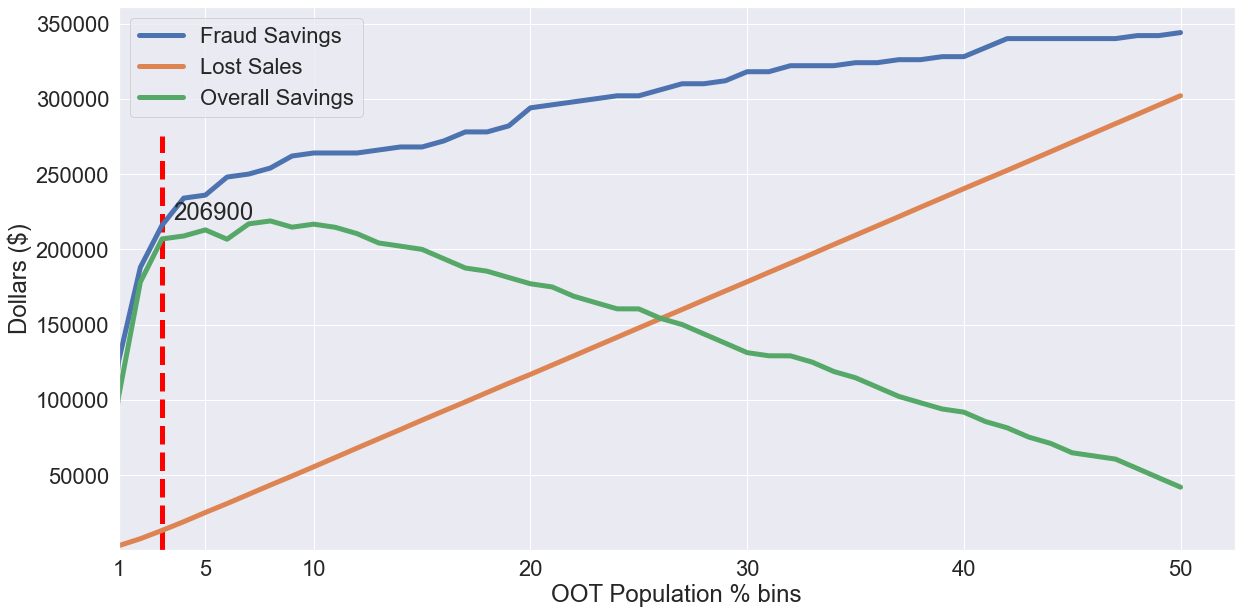

In [47]:
import matplotlib.pylab as plt

sns.set(font_scale=2)
lists = sorted(savings.items()) # sorted by key, return a list of tuples
# loss = sorted(losses.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
x,z = zip(*losses.items())
x,b = zip(*overall_savings.items())
axes = plt.axes()
plt.plot(x, y, label='Fraud Savings', linewidth = 5)
plt.plot(x,z, label = 'Lost Sales', linewidth = 5)
plt.plot(x,b, label = 'Overall Savings', linewidth = 5)
plt.ylim(ymin=1)
plt.xlim(xmin=1)
plt.xlabel("OOT Population % bins")
plt.ylabel("Dollars ($)")
plt.vlines(x=3, ymin=0, ymax=275000, color='red', zorder=2, linestyles='dashed', linewidth = 5)
axes.set_xticks([1,5,10,20,30,40,50])
plt.annotate('206900',(3.5,220000))
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
#plt.figursize(10,10)
plt.show()

# Analyze merchnum and cardnum

In [126]:
X_trn_eval['index_num']=X_trn_eval.index
X_tst_eval['index_num']=X_tst_eval.index
X_oot_eval['index_num']=X_oot_eval.index

In [127]:
X_tst_eval

,cardnum_zip_total_7,cardnum_merchdes_total_7,cardnum_state_total_3,cardnum_merchdes_total_14,cardnum_zip_total_14,cardnum_state_total_7,cardnum_merch_total_1,cardnum_merch_total_30,cardnum_merchdes_max_14,cardnum_merchdes_total_0,cardnum_state_max_7,cardnum_merch_max_14,Cardnum_total_7,merchnum_zip_total_1,merchdes_state_total_0,merchdes_zip_max_0,merchdes_zip_total_0,merchdes_zip_max_1,Cardnum_total_0,cardnum_merchdes_max_0,predicted,Fraud,index_num
64778,-0.147896,-0.140258,-0.153744,-0.156549,-0.168207,-0.188262,-0.122536,-0.190228,-0.357632,-0.160014,-0.387414,-0.357892,0.071239,0.031530,0.172279,0.611212,0.173073,0.467708,-0.184930,-0.335654,0.001233,0,64778
63150,-0.004441,0.003466,-0.010866,-0.015232,-0.027336,0.145580,0.023945,-0.053259,0.204990,0.064898,0.255925,0.206391,-0.116964,-0.096352,-0.021651,0.195079,-0.020951,0.104797,-0.013302,0.293650,0.002389,0,63150
73002,-0.069239,-0.061454,-0.075404,-0.053574,-0.065558,-0.112255,-0.042221,-0.090422,-0.096904,-0.181813,-0.144330,-0.096393,-0.261797,-0.157446,-0.246641,-0.442886,-0.246049,-0.167364,-0.201565,-0.396647,0.001265,0,73002
32736,-0.162080,-0.154468,-0.053591,-0.170521,-0.182136,-0.091092,-0.137019,-0.201557,-0.413261,-0.182252,-0.063224,-0.413685,0.102173,0.576218,0.031705,-0.133636,0.032431,1.027111,-0.201900,-0.397876,0.001106,0,32736
62700,0.121230,-0.156821,0.059015,-0.172834,0.108694,0.071799,-0.046758,0.075835,-0.453595,-0.185934,-0.471201,-0.449500,-0.163739,-0.102410,-0.250398,-0.485716,-0.249808,-0.488926,-0.096142,-0.442991,0.008810,0,62700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20611,-0.161797,-0.154185,-0.128031,-0.170243,-0.181858,-0.163314,-0.136731,-0.203501,-0.412153,-0.181809,-0.337545,-0.412573,-0.210887,-0.244712,-0.210765,-0.442876,-0.246045,-0.451565,-0.201562,-0.396637,0.000957,0,20611
49624,-0.077516,-0.069747,-0.083648,-0.087218,-0.099096,-0.120253,-0.050672,-0.123031,-0.081609,-0.049672,-0.130070,-0.081054,-0.277718,0.408901,-0.126134,-0.101185,-0.125484,1.658479,-0.100729,-0.026917,0.001973,0,49624
24080,-0.172201,-0.165492,-0.178830,-0.181360,-0.184898,-0.211749,-0.148254,-0.207867,-0.456413,-0.199503,-0.479511,-0.456964,-0.174918,-0.252803,-0.262773,-0.488629,-0.262189,-0.491467,-0.215064,-0.446143,0.000926,0,24080
14864,-0.126005,-0.119209,-0.132820,-0.135852,-0.132997,-0.167109,-0.101084,-0.169327,-0.422652,-0.144715,-0.448034,-0.423103,0.079333,-0.047096,-0.195148,-0.453729,-0.194531,-0.461030,0.133322,-0.408380,0.001057,0,14864


In [129]:
df_pred=X_trn_eval.append(X_tst_eval,ignore_index=True).append(X_oot_eval,ignore_index=True)
df_pred

,cardnum_zip_total_7,cardnum_merchdes_total_7,cardnum_state_total_3,cardnum_merchdes_total_14,cardnum_zip_total_14,cardnum_state_total_7,cardnum_merch_total_1,cardnum_merch_total_30,cardnum_merchdes_max_14,cardnum_merchdes_total_0,cardnum_state_max_7,cardnum_merch_max_14,Cardnum_total_7,merchnum_zip_total_1,merchdes_state_total_0,merchdes_zip_max_0,merchdes_zip_total_0,merchdes_zip_max_1,Cardnum_total_0,cardnum_merchdes_max_0,predicted,Fraud,index_num
0,-0.116247,-0.108550,-0.122223,-0.125371,-0.137128,-0.157679,-0.090219,-0.160010,-0.233506,-0.110394,-0.271688,-0.233399,-0.299930,-0.201766,-0.181510,-0.258205,-0.180886,-0.290513,-0.147066,-0.196817,0.000992,0,24668
1,-0.088721,-0.080973,-0.094808,-0.098256,-0.110099,-0.131081,-0.062114,-0.133729,-0.125554,-0.067239,-0.171041,-0.125128,-0.284144,-0.175814,-0.142154,-0.146612,-0.141512,-0.193193,-0.114135,-0.076070,0.001090,0,70322
2,-0.160664,-0.153051,-0.166462,-0.169127,-0.180746,-0.200601,-0.135574,-0.202420,-0.407711,-0.180034,-0.434104,-0.408118,-0.325403,-0.243644,-0.245018,-0.438284,-0.244425,-0.447560,-0.200207,-0.391668,0.000957,0,67998
3,-0.136396,-0.130591,-0.147711,-0.147044,-0.122925,-0.177150,-0.139681,-0.145346,-0.373940,-0.186339,-0.402618,-0.374247,-0.311485,-0.201616,-0.197095,-0.454381,-0.196479,-0.461599,-0.205018,-0.429687,0.000966,0,41612
4,-0.144388,-0.136744,-0.150251,0.282605,0.269562,-0.184873,-0.118954,0.235415,0.876987,-0.154515,-0.374589,0.880373,-0.016144,0.753203,0.253100,0.287435,0.253932,1.582948,-0.180734,-0.320267,0.003353,0,16882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93054,-0.153323,-0.145695,-0.159150,-0.161895,-0.173537,-0.193507,-0.128078,-0.195410,-0.378917,-0.168523,-0.407259,-0.379239,-0.321193,-0.236722,-0.234521,-0.408519,-0.233923,-0.421603,-0.191423,-0.359462,0.000957,0,96392
93055,-0.145051,-0.137407,0.035290,-0.009809,-0.021930,-0.004857,-0.119631,-0.048003,0.113135,-0.155554,0.200818,0.114265,0.105639,-0.228923,-0.222693,-0.374982,-0.222090,-0.392355,0.018099,-0.323173,0.001715,0,96393
93056,-0.085418,-0.077664,-0.074087,-0.095002,-0.106855,-0.110977,-0.058741,-0.130576,-0.112600,-0.062061,-0.158964,-0.112136,0.027114,1.071446,1.749292,1.964743,1.750844,1.648127,-0.110183,-0.061581,0.009181,0,96394
93057,0.362406,0.371000,0.354508,0.346148,0.332904,0.304853,0.398529,0.423430,1.643744,0.640051,1.478528,1.649393,-0.025425,1.057745,0.502862,1.682354,0.503815,1.497039,0.425591,1.902925,0.006903,0,96395


In [132]:
df_pred.index_num.value_counts()

4094     1
72374    1
92856    1
90809    1
94907    1
        ..
13676    1
15725    1
9582     1
11631    1
4098     1
Name: index_num, Length: 93059, dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 689 entries, Recnum to merchdes_state_count_1_by_30
dtypes: float64(606), int64(69), object(14)
memory usage: 507.5+ MB


In [134]:
#df=pd.read_csv('final.csv',index_col=0)
df_whole=df.loc[df['Date'] > '2010-01-14'].iloc[:,:10]
df_whole.head(1)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
3338,3345,5142289869,2010-01-15,602608969534,FISHERSCIATL,GA,30024,P,333.47,0


In [135]:
df_whole['index_num']=df_whole.index
df_whole

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,index_num
3338,3345,5142289869,2010-01-15,602608969534,FISHERSCIATL,GA,30024,P,333.47,0,3338
3339,3346,5142148452,2010-01-15,5509006296254,FEDEXSHP01/10/10AB#,TN,38118,P,4.37,0,3339
3340,3347,5142184598,2010-01-15,680655463,MCMASTERCARRSUPP,IL,60126,P,271.93,0,3340
3341,3348,5142148452,2010-01-15,5509006296254,FEDEXSHP01/10/10AB#,TN,38118,P,3.62,0,3341
3342,3349,5142195887,2010-01-15,4503082616100,OFFICEDEPOT#122,NC,27707,P,16.28,0,3342
...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BESTBUY00001610,KY,41042,P,84.79,0,96392
96393,96750,5142225701,2010-12-31,8090710030950,MARKUSOFFICESUPPLIES,OH,45248,P,118.75,0,96393
96394,96751,5142226486,2010-12-31,4503057341100,"TECHPAC,INC",OH,45150,P,363.56,0,96394
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0,96395


In [137]:
df_wholepred=df_whole.merge(df_pred,how='inner',on='index_num')
df_wholepred

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud_x,index_num,cardnum_zip_total_7,cardnum_merchdes_total_7,cardnum_state_total_3,cardnum_merchdes_total_14,cardnum_zip_total_14,cardnum_state_total_7,cardnum_merch_total_1,cardnum_merch_total_30,cardnum_merchdes_max_14,cardnum_merchdes_total_0,cardnum_state_max_7,cardnum_merch_max_14,Cardnum_total_7,merchnum_zip_total_1,merchdes_state_total_0,merchdes_zip_max_0,merchdes_zip_total_0,merchdes_zip_max_1,Cardnum_total_0,cardnum_merchdes_max_0,predicted,Fraud_y
0,3345,5142289869,2010-01-15,602608969534,FISHERSCIATL,GA,30024,P,333.47,0,3338,0.303517,0.312000,-0.098818,0.288136,0.275075,0.247947,-0.066225,0.240776,0.479800,-0.073552,0.393348,0.482013,0.168681,-0.179610,-0.147911,-0.162936,-0.147272,-0.207429,-0.118952,-0.093733,0.007868,0
1,3346,5142148452,2010-01-15,5509006296254,FEDEXSHP01/10/10AB#,TN,38118,P,4.37,0,3339,-0.090858,-0.161221,-0.136437,-0.177161,-0.067038,-0.133145,-0.148080,-0.099025,-0.447500,-0.199235,-0.469063,-0.445725,-0.193660,-0.255191,-0.262529,-0.487938,-0.261945,-0.490864,-0.214860,-0.445395,0.000958,0
2,3347,5142184598,2010-01-15,680655463,MCMASTERCARRSUPP,IL,60126,P,271.93,0,3340,-0.031981,-0.024126,0.051969,0.371331,0.358008,0.011325,-0.004176,0.321412,0.069696,-0.097054,-0.151393,0.070698,1.018389,-0.122317,-0.169344,-0.223710,-0.168715,-0.254573,-0.136886,-0.159492,0.005176,0
3,3348,5142148452,2010-01-15,5509006296254,FEDEXSHP01/10/10AB#,TN,38118,P,3.62,0,3341,-0.089976,-0.160338,-0.135559,-0.176292,-0.066172,-0.132293,-0.147180,-0.098183,-0.447500,-0.197853,-0.469063,-0.445725,-0.193154,-0.254360,-0.261268,-0.487938,-0.260683,-0.490864,-0.213805,-0.445395,0.000958,0
4,3349,5142195887,2010-01-15,4503082616100,OFFICEDEPOT#122,NC,27707,P,16.28,0,3342,-0.170011,-0.162414,-0.175771,-0.178334,-0.189924,-0.209633,-0.145118,-0.211344,-0.444367,-0.194687,-0.468279,-0.444882,-0.330763,-0.252456,-0.258381,-0.476176,-0.257795,-0.480606,-0.211389,-0.432668,0.000926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93054,96749,5142276053,2010-12-31,3500000006160,BESTBUY00001610,KY,41042,P,84.79,0,96392,-0.153323,-0.145695,-0.159150,-0.161895,-0.173537,-0.193507,-0.128078,-0.195410,-0.378917,-0.168523,-0.407259,-0.379239,-0.321193,-0.236722,-0.234521,-0.408519,-0.233923,-0.421603,-0.191423,-0.359462,0.000957,0
93055,96750,5142225701,2010-12-31,8090710030950,MARKUSOFFICESUPPLIES,OH,45248,P,118.75,0,96393,-0.145051,-0.137407,0.035290,-0.009809,-0.021930,-0.004857,-0.119631,-0.048003,0.113135,-0.155554,0.200818,0.114265,0.105639,-0.228923,-0.222693,-0.374982,-0.222090,-0.392355,0.018099,-0.323173,0.001715,0
93056,96751,5142226486,2010-12-31,4503057341100,"TECHPAC,INC",OH,45150,P,363.56,0,96394,-0.085418,-0.077664,-0.074087,-0.095002,-0.106855,-0.110977,-0.058741,-0.130576,-0.112600,-0.062061,-0.158964,-0.112136,0.027114,1.071446,1.749292,1.964743,1.750844,1.648127,-0.110183,-0.061581,0.009181,0
93057,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0,96395,0.362406,0.371000,0.354508,0.346148,0.332904,0.304853,0.398529,0.423430,1.643744,0.640051,1.478528,1.649393,-0.025425,1.057745,0.502862,1.682354,0.503815,1.497039,0.425591,1.902925,0.006903,0


In [138]:
len(df_wholepred['Fraud_x'])/len(df_wholepred['Fraud_y'])

1.0

In [161]:
df_wholepred_fraud=df_wholepred[df_wholepred['Fraud_x']==1]
df_wholepred_fraud['Merchnum'].value_counts()

4353000719908    107
930090121224      50
8834000695423     46
4620009957157     39
4503738417400     37
900009045549      36
618901687330      36
4503082476300     35
253052983001      33
9108234610000     33
938909877224      32
997674930332      29
6006333528866     27
6070095870009     27
9900020006406     25
92891948003       24
6005030600003     24
8292309000040     20
6899988049601     18
6170075665        18
5863604000604     10
9108234610006     10
5000006000095      9
6929               8
679613867334       8
4591200814444      7
5725000466504      5
9977060941600      4
08-0096054334      4
08-0616075333      4
08-0004002336      4
4063000739258      4
2094206450000      4
80600010008        3
6354700620006      3
2376700062950      3
7593860068556      3
8834000695412      3
9918000409955      3
35068516332        3
9977060505000      3
6635700620033      3
5600000064466      3
2200000002891      3
4574100694444      3
08-3508354542      2
4503015307200      2
9977060860500

In [181]:
df_wholepred['Date']=pd.to_datetime(df_wholepred['Date'])
type(df_wholepred.iloc[0,2])


pandas._libs.tslibs.timestamps.Timestamp

Text(0.5, 1.0, 'Merchnum 4353000719908')

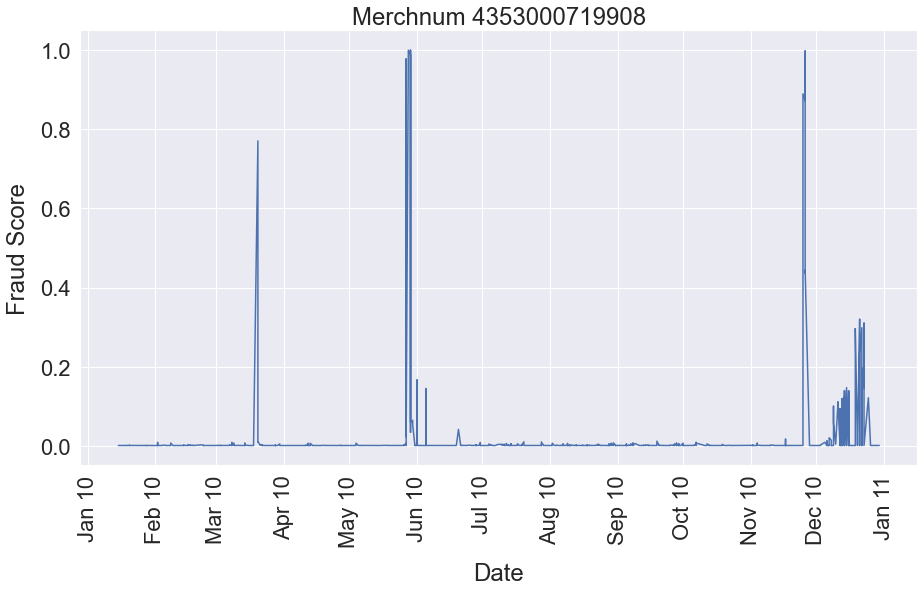

In [195]:
# we chose the merchnum that has the most fraud
# find which month to analyze
find_month=df_wholepred.loc[df_wholepred['Merchnum']=='4353000719908']
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = 22
fig = plt.figure()
ax = plt.axes()

plt.plot(find_month['Date'], find_month['predicted'])
months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.xticks(rotation='90',visible=True)
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Merchnum 4353000719908")

In [184]:
# we chose the merchnum that has the most fraud
merc_toplot=df_wholepred.loc[(df_wholepred['Merchnum']=='4353000719908')&(df_wholepred['Date']<'2010-12-01')&(df_wholepred['Date']>'2010-10-31')]
merc_toplot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 80766 to 86226
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Recnum                     93 non-null     int64         
 1   Cardnum                    93 non-null     int64         
 2   Date                       93 non-null     datetime64[ns]
 3   Merchnum                   93 non-null     object        
 4   Merch description          93 non-null     object        
 5   Merch state                93 non-null     object        
 6   Merch zip                  93 non-null     object        
 7   Transtype                  93 non-null     object        
 8   Amount                     93 non-null     float64       
 9   Fraud_x                    93 non-null     int64         
 10  index_num                  93 non-null     int64         
 11  cardnum_zip_total_7        93 non-null     float32       
 12  car

In [142]:
merc_toplot

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud_x,index_num,cardnum_zip_total_7,cardnum_merchdes_total_7,cardnum_state_total_3,cardnum_merchdes_total_14,cardnum_zip_total_14,cardnum_state_total_7,cardnum_merch_total_1,cardnum_merch_total_30,cardnum_merchdes_max_14,cardnum_merchdes_total_0,cardnum_state_max_7,cardnum_merch_max_14,Cardnum_total_7,merchnum_zip_total_1,merchdes_state_total_0,merchdes_zip_max_0,merchdes_zip_total_0,merchdes_zip_max_1,Cardnum_total_0,cardnum_merchdes_max_0,predicted,Fraud_y
80766,84434,5142170410,2010-11-01,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,35.94,0,84104,-0.165222,-0.157617,-0.171001,-0.173617,-0.185221,-0.205005,-0.140228,-0.206771,-0.425585,-0.187179,-0.450769,-0.426045,-0.328017,-0.247941,-0.251534,-0.456761,-0.250944,-0.463674,-0.205659,-0.411660,0.000954,0
80786,84454,5142141358,2010-11-01,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,34.02,0,84124,-0.165690,-0.158085,-0.171467,-0.174077,-0.185681,-0.205457,-0.140705,-0.207218,-0.427419,-0.187912,-0.452479,-0.427884,-0.328285,-0.240128,-0.239685,-0.456761,-0.239090,-0.463674,-0.206219,-0.413712,0.000950,0
80856,84524,5142124208,2010-11-02,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,421.80,0,84194,-0.071232,-0.063451,-0.077389,-0.081027,-0.092924,-0.114181,-0.044255,-0.117031,-0.056962,-0.039819,-0.107090,-0.056333,-0.120129,-0.143257,-0.117148,-0.075706,-0.116494,-0.131355,-0.093211,0.000652,0.001312,0
80945,84613,5142224426,2010-11-02,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,56.95,0,84283,-0.160104,-0.152489,-0.165904,-0.160033,-0.171680,-0.200060,-0.135002,0.359116,-0.405513,-0.179155,-0.432055,-0.405914,-0.325082,-0.130178,-0.097314,-0.075706,-0.096650,-0.131355,-0.199537,-0.389210,0.001774,0
81003,84671,5142132687,2010-11-02,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,21.42,0,84341,-0.168759,-0.161160,-0.174524,-0.177101,-0.188695,-0.208423,-0.143839,-0.210148,-0.439456,-0.192724,-0.463701,-0.439957,-0.330045,-0.125259,-0.089854,-0.075706,-0.089187,-0.131355,-0.209891,-0.427176,0.000955,0
81025,84693,5142158538,2010-11-02,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,78.90,0,84363,-0.154757,-0.147133,-0.160579,-0.067837,-0.079776,-0.194893,-0.129543,-0.104246,-0.079823,-0.170772,-0.412505,-0.079262,-0.284657,-0.107139,-0.062375,-0.075706,-0.061694,-0.131355,-0.193140,-0.365755,0.001044,0
81058,84726,5142152982,2010-11-02,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,19.91,0,84396,-0.169127,-0.161529,-0.174890,-0.177463,-0.189056,-0.208778,-0.144215,-0.210500,-0.440899,-0.193301,-0.465046,-0.441404,-0.010355,-0.102566,-0.055441,-0.075706,-0.054757,-0.131355,-0.210331,-0.428789,0.000978,0
81078,84747,5142150217,2010-11-03,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,248.55,0,84416,-0.113433,-0.105731,-0.119420,-0.122600,-0.134365,-0.154960,-0.087347,-0.157324,-0.222472,-0.105983,-0.261401,-0.222333,0.127010,-0.061551,-0.177487,-0.246799,-0.176862,-0.131355,-0.143700,-0.184475,0.001110,0
81445,85119,5142189945,2010-11-04,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,10.39,0,84783,-0.171445,-0.163852,-0.177200,-0.179747,-0.191333,-0.211019,-0.146583,-0.212714,-0.449994,-0.196936,-0.473526,-0.450525,1.770373,-0.196727,-0.260432,-0.481993,-0.259847,-0.280566,-0.213105,-0.438962,0.000969,0
81464,85139,5142170410,2010-11-04,4353000719908,ACI*AMAZON.COMINC,WA,98101,P,720.05,0,84802,0.010172,0.018106,0.003688,-0.000837,-0.012987,-0.035518,0.029926,-0.039307,0.227965,0.074083,0.158556,0.229435,-0.071020,-0.031360,-0.009656,0.218830,-0.008951,0.125510,-0.006293,0.319349,0.002933,0


In [143]:
len(merc_toplot) # number of transactions of this merchnum in November

93

In [186]:
len(merc_toplot.loc[merc_toplot['Date']=='2010-11-26'])

15

In [156]:
len(merc_toplot.loc[merc_toplot['Date']=='2010-11-25'])

17

Text(0.5, 1.0, 'Merchnum 4353000719908')

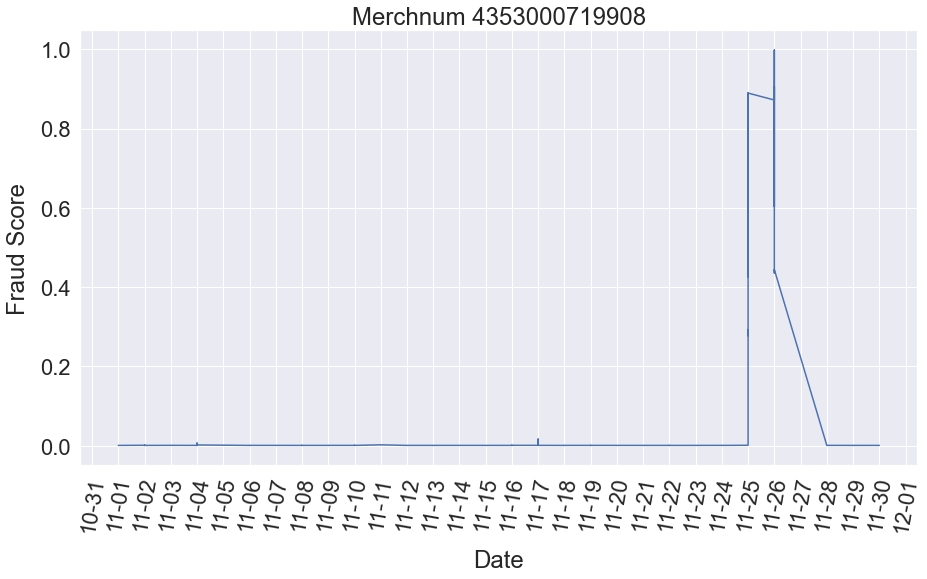

In [189]:
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = 22
fig = plt.figure()
ax = plt.axes()

plt.plot(merc_toplot['Date'], merc_toplot['predicted'])
days = mdates.DayLocator()  
ax.xaxis.set_major_locator(days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation='80')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Merchnum 4353000719908")







Text(0, 0.5, 'Fraud Score')

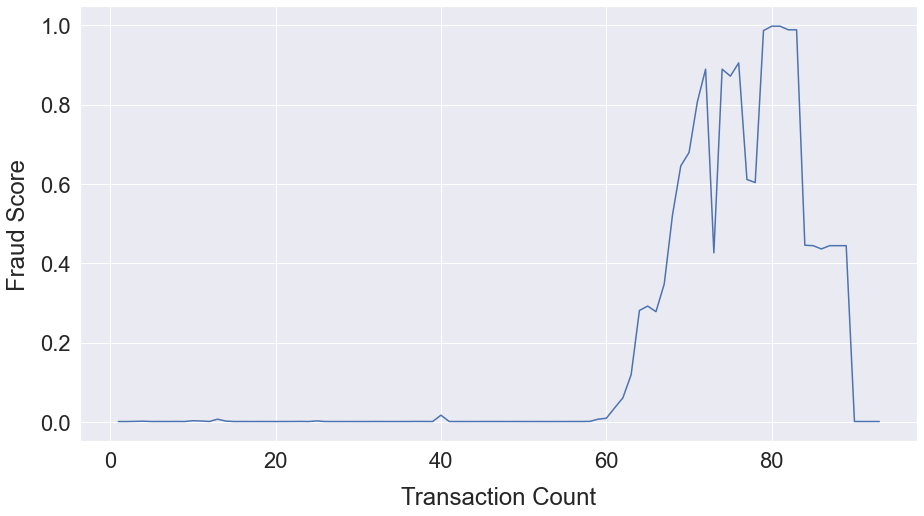

In [154]:
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = 22
fig = plt.figure()
ax = plt.axes()

plt.plot(range(1, len(merc_toplot)+1), merc_toplot['predicted'])
# plt.xticks()
plt.xlabel('Transaction Count', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)

###### In 25,26 two days, 32 transactions occurred leading to the peak of the fraud score

In [162]:
df_wholepred_fraud['Cardnum'].value_counts()

5142140316    46
5142199009    45
5142189341    41
5142160778    40
5142181728    39
5142212038    39
5142220919    38
5142847398    37
5142202847    37
5142214614    37
5142138135    36
5142271065    34
5142235211    32
5142197711    32
5142179617    32
5142152857    32
5142182128    31
5142197563    30
5142116864    28
5142176939    28
5142299705    27
5142189113    27
5142111125    26
5142183973    25
5142249750    24
5142206786    20
5142245297    12
5142225942    10
5142232349    10
5142205500     9
5142219623     8
5142151962     8
5142153880     5
5142223373     4
5142231351     4
5142167189     4
5142226204     4
5142210575     3
5142279088     3
5142210322     3
5142234238     3
5142192995     3
5142243247     3
5142233702     3
5142125194     3
5142228270     3
5142221788     3
5142277104     2
5142299410     2
5142226979     2
5142167414     2
5142121328     2
5142132574     2
5142223569     2
5142220785     2
5142248738     2
5142241589     2
5142232272     2
5142221930    

Text(0.5, 1.0, 'Cardnum5142140316')

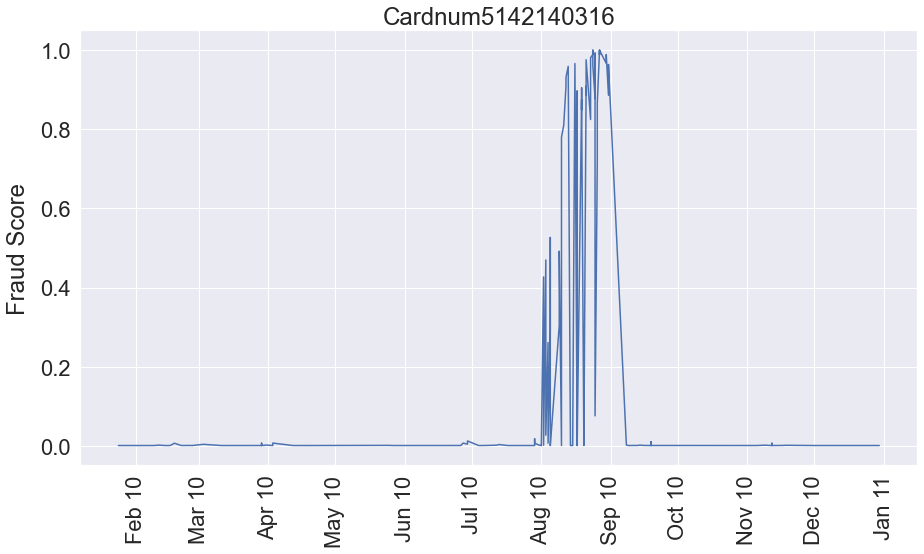

In [196]:
# we chose the cardnum that has the most fraud
# find which month to analyze
find_month=df_wholepred.loc[df_wholepred['Cardnum']==5142140316]
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = 22
fig = plt.figure()
ax = plt.axes()

plt.plot(find_month['Date'], find_month['predicted'])
months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.xticks(rotation='90')
#plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Cardnum5142140316")





In [209]:
# we chose the cardnum that has the most fraud
cardnum_toplot=df_wholepred.loc[(df_wholepred['Cardnum']==5142140316)&(df_wholepred['Date']<'2010-09-25')&(df_wholepred['Date']>'2010-08-24')]

Text(0.5, 1.0, 'Cardnum 5142140316')

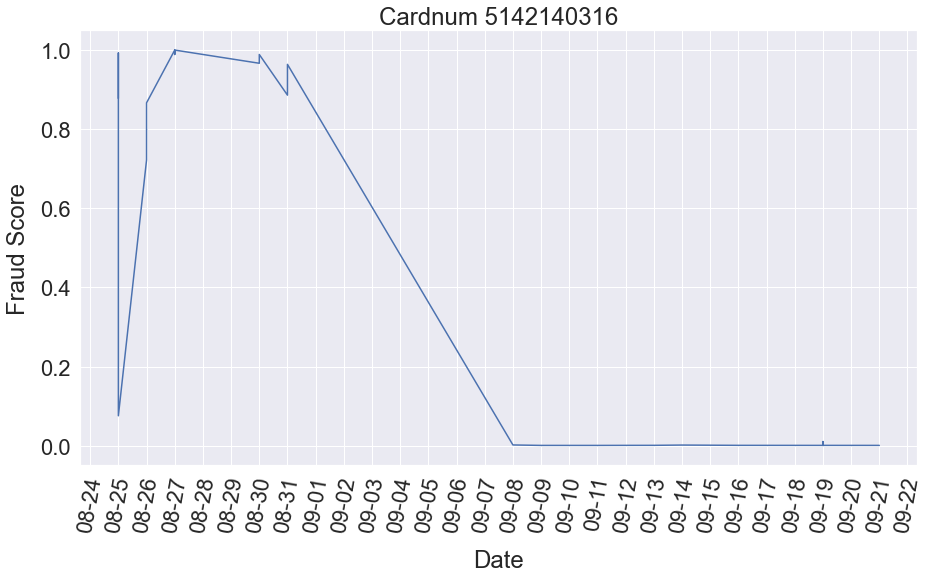

In [210]:
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = 22
fig = plt.figure()
ax = plt.axes()

plt.plot(cardnum_toplot['Date'], cardnum_toplot['predicted'])
days = mdates.DayLocator()  
ax.xaxis.set_major_locator(days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation='80')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)
plt.title("Cardnum 5142140316")

Text(0, 0.5, 'Fraud Score')

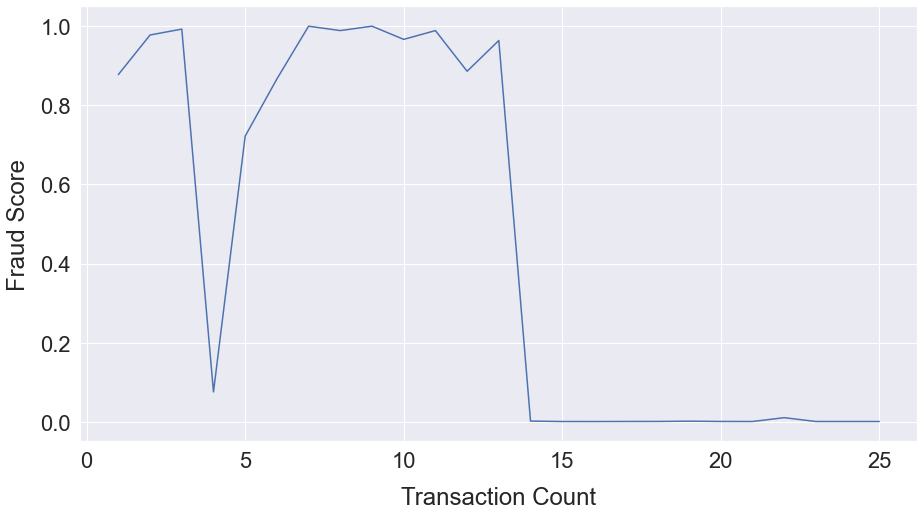

In [211]:
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = 22
fig = plt.figure()
ax = plt.axes()

plt.plot(range(1, len(cardnum_toplot)+1), cardnum_toplot['predicted'])
# plt.xticks()
plt.xlabel('Transaction Count', labelpad=15)
plt.ylabel('Fraud Score', labelpad=10)

In [212]:
len(cardnum_toplot) # number of transactions of this card number in rhis time period

25

In [214]:
len(cardnum_toplot.loc[(cardnum_toplot['Date']<'2010-09-03')&(cardnum_toplot['Date']>'2010-08-24')])

13

###### In the 10 days,13 transactions occurred leading to the peak of the fraud score